### Import Required Libraries

In [2]:
from pymatreader import read_mat
import numpy
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.signal import savgol_filter
from scipy.stats import norm
import pandas as pd
import pylab as pl
%matplotlib inline

### Load Dataset and Initialize

In [3]:
data = read_mat('150805.mat')

In [3]:
codes_5=data['Event']['mgs']['codes'][:,4] # all locations
s_mgs_4=data['spike'][10][0]['mgs'] # mgs data
m_mgs_4=data['spike'][14][1]['mgs'] # mgs data

## Question 1 :

**You should select two neurons (one from MUA and one from SUA) and answer the following questions based on mgs task answer for each neuron :**

Part 1 : Plot the PSTH and Raster plot of all trials of each IN and OUT condition for your selected neurons. (try to compare IN and OUT conditions like the example plot for control and adapting conditions or using different colors)

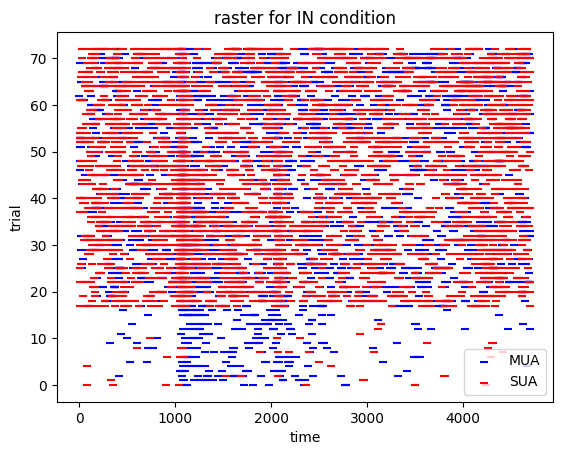

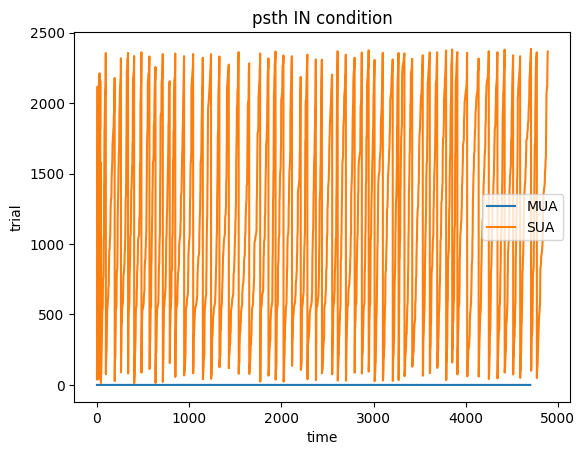

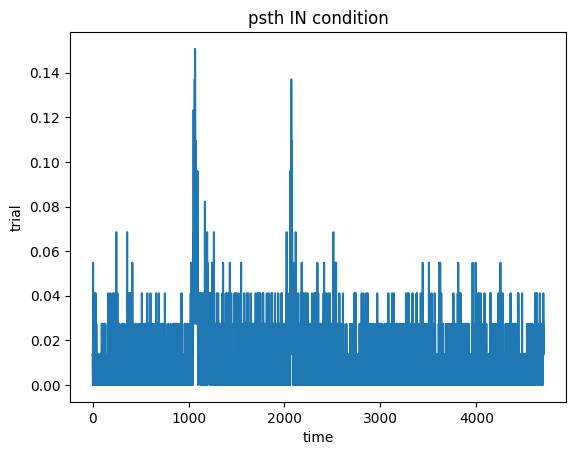

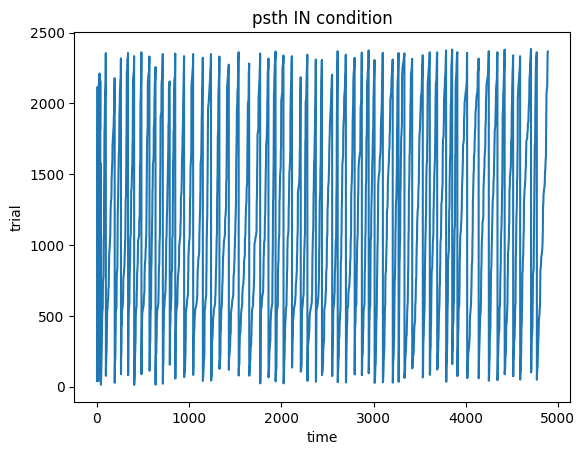

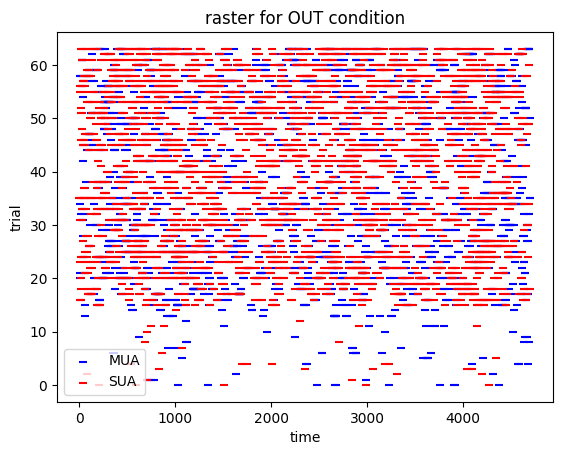

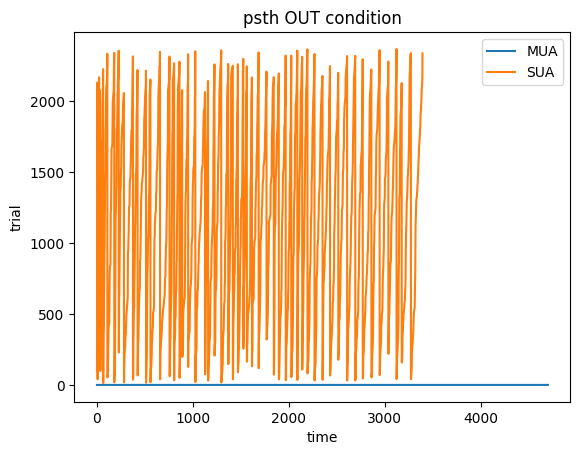

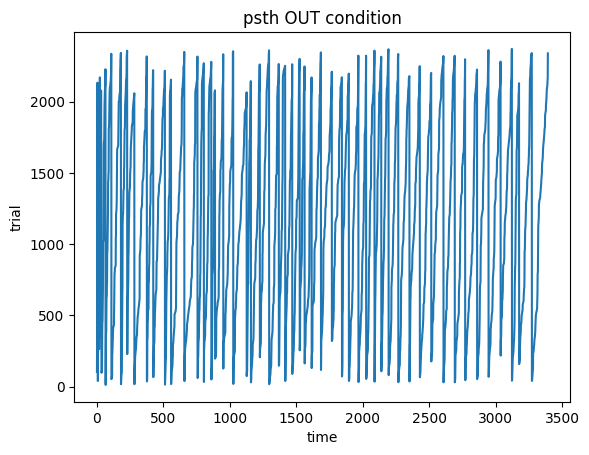

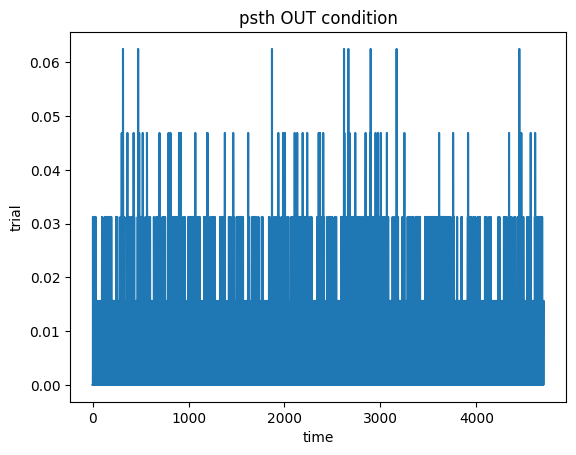

In [22]:
index_t_51= numpy.where(codes_5==51)[0] # all index of location 51 
index_t_54= numpy.where(codes_5==54)[0] # all index of location 54 

psth_in=s_mgs_4[index_t_51,:] # all trial with location 51
psth_out=s_mgs_4[index_t_54,:] # all trial with location 54
raster_in=numpy.where(psth_in!=0)# raster for IN condition
raster_out=numpy.where(psth_out!=0)# raster for OUT condition

m_psth_in=m_mgs_4[index_t_51,:] # all trial with location 51
m_psth_out=m_mgs_4[index_t_54,:] # all trial with location 54
m_raster_in=numpy.where(m_psth_in!=0)# raster for IN condition
m_raster_out=numpy.where(m_psth_out!=0)# raster for OUT condition



# plot raster IN condition
plt.figure(1)
x=raster_in[1]
y=raster_in[0]
plt.scatter(x, y, marker='_', color='b')
x=m_raster_in[1]
y=m_raster_in[0]
plt.scatter(x, y, marker='_', color='r')
plt.legend(['MUA' , 'SUA'])
plt.xlabel('time')
plt.ylabel('trial')
plt.title('raster for IN condition')

plt.figure(2)
plt.plot(numpy.mean(psth_in,axis=0))
plt.plot(numpy.mean(m_raster_in,axis=0))
plt.legend(['MUA' , 'SUA'])
plt.xlabel('time')
plt.ylabel('trial')
plt.title('psth IN condition')

plt.figure(3)
plt.plot(numpy.mean(psth_in,axis=0))
plt.xlabel('time')
plt.ylabel('trial')
plt.title('psth IN condition')


plt.figure(4)
plt.plot(numpy.mean(m_raster_in,axis=0))
plt.xlabel('time')
plt.ylabel('trial')
plt.title('psth IN condition')

# plot raster OUT condition
plt.figure(5)
x=raster_out[1]
y=raster_out[0]
plt.scatter(x, y, marker='_', color='b')
x=m_raster_out[1]
y=m_raster_out[0]
plt.scatter(x, y, marker='_', color='r')
plt.legend(['MUA' , 'SUA'])
plt.xlabel('time')
plt.ylabel('trial')
plt.title('raster for OUT condition')

plt.figure(6)
plt.plot(numpy.mean(psth_out,axis=0))
plt.plot(numpy.mean(m_raster_out,axis=0))
plt.legend(['MUA' , 'SUA'])
plt.xlabel('time')
plt.ylabel('trial')
plt.title('psth OUT condition')

plt.figure(7)
plt.plot(numpy.mean(m_raster_out,axis=0))
plt.xlabel('time')
plt.ylabel('trial')
plt.title('psth OUT condition')

plt.figure(8)
plt.plot(numpy.mean(psth_out,axis=0))
plt.xlabel('time')
plt.ylabel('trial')
plt.title('psth OUT condition')


plt.show()

Text(0.5, 1.0, 'raster for OUT condition')

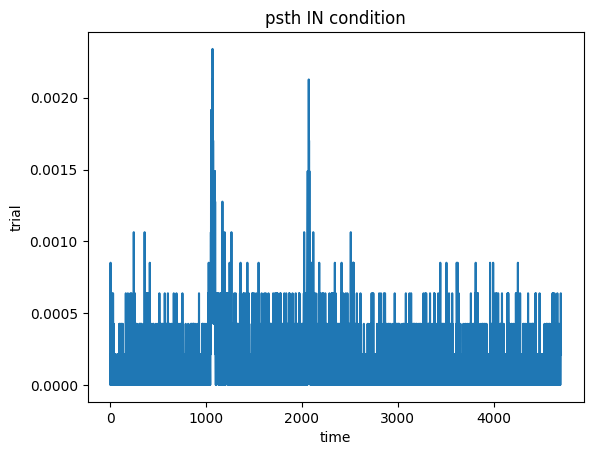

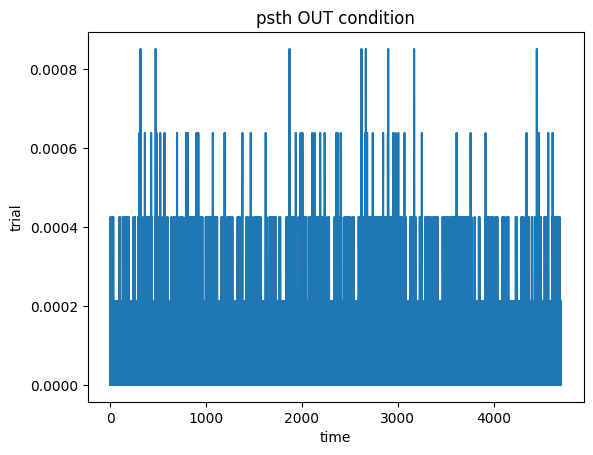

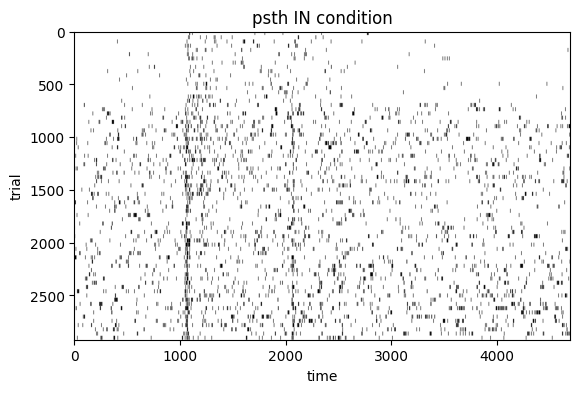

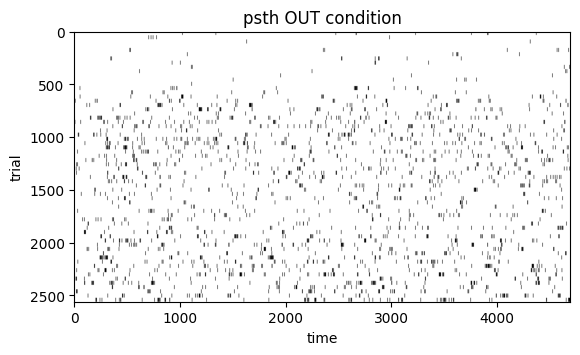

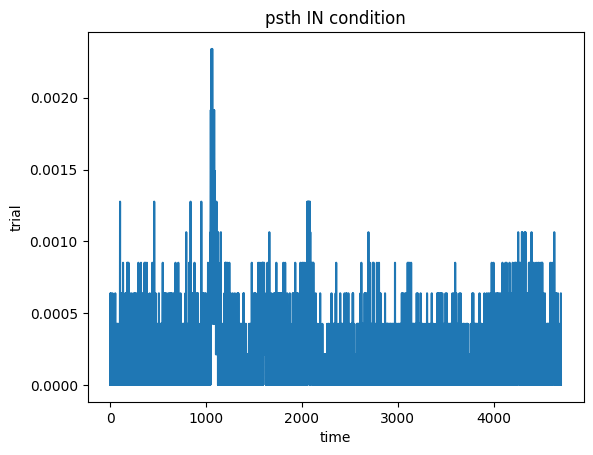

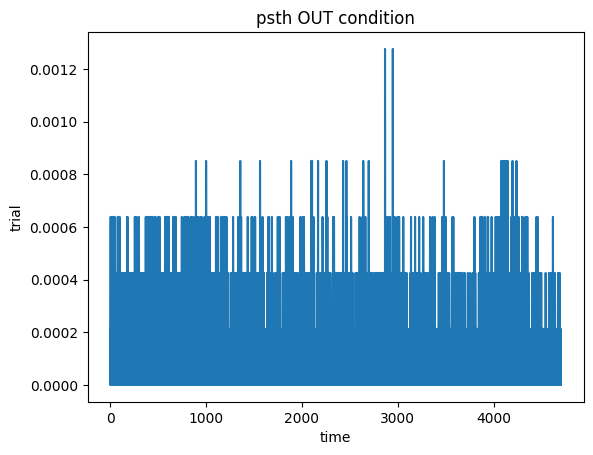

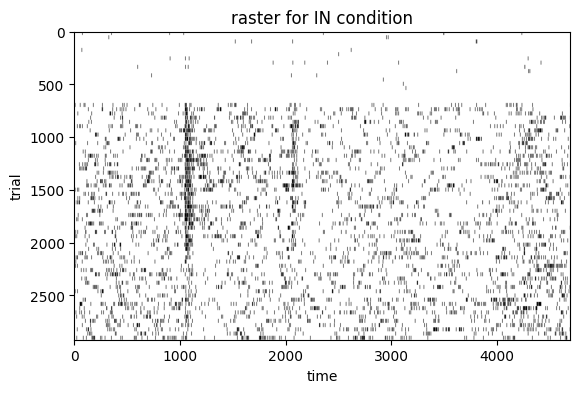

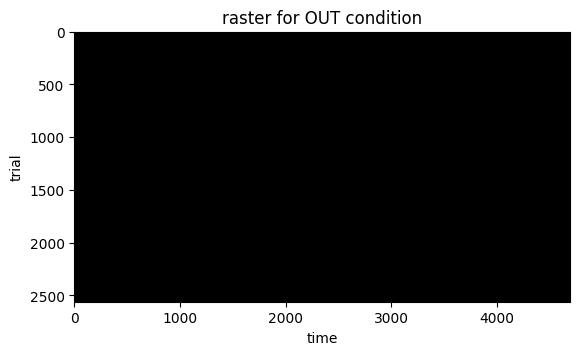

In [25]:
s_mgs_4_IN = numpy.zeros((4701, 4701))  
s_mgs_4_IN_R = numpy.zeros((4701, 4701))  
s_mgs_4_OUT = numpy.zeros((4701, 4701))  
s_mgs_4_OUT_R = numpy.zeros((4701, 4701))  
Q = [0, 0]

for i in range(len(codes_5)):
    if codes_5[i] == 51:
        Q[0] += 1
        s_mgs_4_IN[Q[0] - 1, :] = s_mgs_4[i, :]
        for j in range(1, 39):
            s_mgs_4_IN_R[(40*Q[0] - 40 + j - 1), :] = s_mgs_4[i, :]
        s_mgs_4_IN_R[(40*Q[0] - 1), :] = 0
        s_mgs_4_IN_R[(40*Q[0]), :] = 0

for i in range(len(codes_5)):
    if codes_5[i] == 54:
        Q[1] += 1
        s_mgs_4_OUT[Q[1] - 1, :] = s_mgs_4[i, :]
        for j in range(1, 39):
            s_mgs_4_OUT_R[(40*Q[1] - 40 + j - 1), :] = s_mgs_4[i, :]
        s_mgs_4_OUT_R[(40*Q[1] - 1), :] = 0
        s_mgs_4_OUT_R[(40*Q[1]), :] = 0

s_mgs_4_IN_RB = numpy.zeros((40*Q[0], len(s_mgs_4_IN_R)-2))
for i in range(40*Q[0]):
    for j in range(2, len(s_mgs_4_IN_R)):
        if s_mgs_4_IN_R[i,j] == 1:
            s_mgs_4_IN_RB[i, j-2:j+3] = s_mgs_4_IN_R[i,j]

s_mgs_4_OUT_RB = numpy.zeros((40*Q[1], len(s_mgs_4_OUT_R)-2))
for i in range(40*Q[1]):
    for j in range(2, len(s_mgs_4_OUT_R)):
        if s_mgs_4_OUT_R[i,j] == 1:
            s_mgs_4_OUT_RB[i, j-2:j+3] = s_mgs_4_OUT_R[i,j]
            
            
m_mgs_4_IN = numpy.zeros((4701, 4701))  
m_mgs_4_IN_R = numpy.zeros((4701, 4701))  
m_mgs_4_OUT = numpy.zeros((4701, 4701))  
m_mgs_4_OUT_R = numpy.zeros((4701, 4701))  
Q = [0, 0]

for i in range(len(codes_5)):
    if codes_5[i] == 51:
        Q[0] += 1
        m_mgs_4_IN[Q[0] - 1, :] = m_mgs_4[i, :]
        for j in range(1, 39):
            m_mgs_4_IN_R[(40*Q[0] - 40 + j - 1), :] = m_mgs_4[i, :]
        m_mgs_4_IN_R[(40*Q[0] - 1), :] = 0
        m_mgs_4_IN_R[(40*Q[0]), :] = 0

for i in range(len(codes_5)):
    if codes_5[i] == 54:
        Q[1] += 1
        m_mgs_4_OUT[Q[1] - 1, :] = m_mgs_4[i, :]
        for j in range(1, 39):
            s_mgs_4_OUT_R[(40*Q[1] - 40 + j - 1), :] = m_mgs_4[i, :]
        m_mgs_4_OUT_R[(40*Q[1] - 1), :] = 0
        m_mgs_4_OUT_R[(40*Q[1]), :] = 0

m_mgs_4_IN_RB = numpy.zeros((40*Q[0], len(m_mgs_4_IN_R)-2))
for i in range(40*Q[0]):
    for j in range(2, len(m_mgs_4_IN_R)):
        if m_mgs_4_IN_R[i,j] == 1:
            m_mgs_4_IN_RB[i, j-2:j+3] = m_mgs_4_IN_R[i,j]

m_mgs_4_OUT_RB = numpy.zeros((40*Q[1], len(m_mgs_4_OUT_R)-2))
for i in range(40*Q[1]):
    for j in range(2, len(m_mgs_4_OUT_R)):
        if m_mgs_4_OUT_R[i,j] == 1:
            m_mgs_4_OUT_RB[i, j-2:j+3] = m_mgs_4_OUT_R[i,j]

plt.figure(1)
plt.plot(numpy.mean(s_mgs_4_IN,axis=0))
plt.xlabel('time')
plt.ylabel('trial')
plt.title('psth IN condition')

plt.figure(2)
plt.plot(numpy.mean(s_mgs_4_OUT,axis=0))
plt.xlabel('time')
plt.ylabel('trial')
plt.title('psth OUT condition')


plt.figure(3)
plt.imshow((~s_mgs_4_IN_RB.astype(int)), cmap='gray')
plt.xlabel('time')
plt.ylabel('trial')
plt.title('psth IN condition')


plt.figure(4)
plt.imshow((~s_mgs_4_OUT_RB.astype(int)), cmap='gray')
plt.xlabel('time')
plt.ylabel('trial')
plt.title('psth OUT condition')

plt.figure(5)
plt.plot(numpy.mean(m_mgs_4_IN,axis=0))
plt.xlabel('time')
plt.ylabel('trial')
plt.title('psth IN condition')

plt.figure(6)
plt.plot(numpy.mean(m_mgs_4_OUT,axis=0))
plt.xlabel('time')
plt.ylabel('trial')
plt.title('psth OUT condition')


plt.figure(7)
plt.imshow((~m_mgs_4_IN_RB.astype(int)), cmap='gray')
plt.xlabel('time')
plt.ylabel('trial')
plt.title('raster for IN condition')


plt.figure(8)
plt.imshow((~m_mgs_4_OUT_RB.astype(int)), cmap='gray')
plt.xlabel('time')
plt.ylabel('trial')
plt.title('raster for OUT condition')

Part 2 : Calculate the time-dependent firing rate of six different locations by applying 4 different kernels across all trials. (suggested kernels: gaussian and casual kernels). Try to plot the firing rates of all conditions in a plot using different colors. So we can compare the response of selected neurons in different conditions.

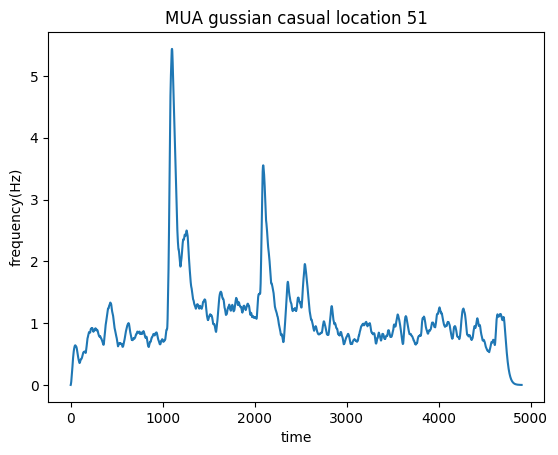

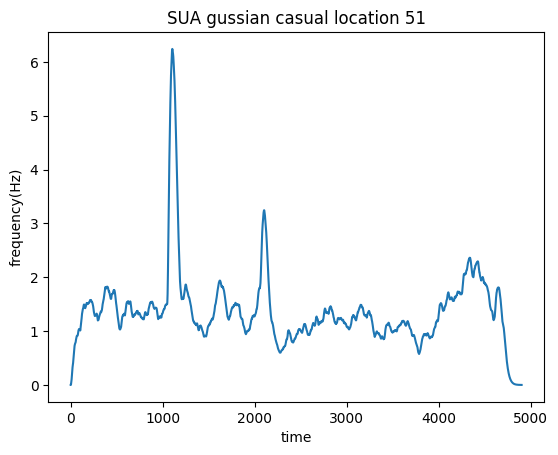

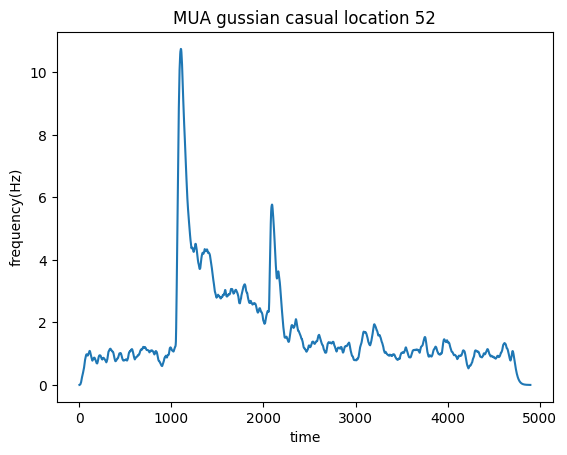

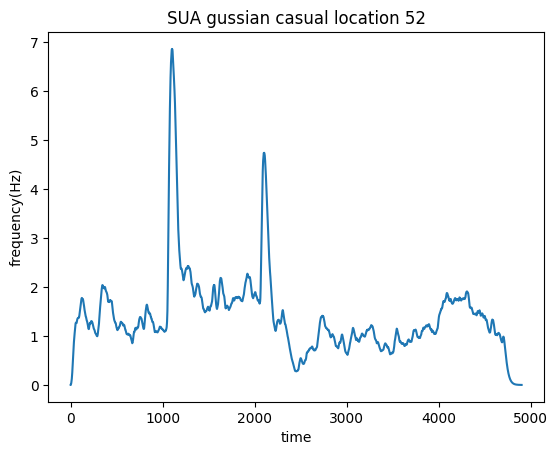

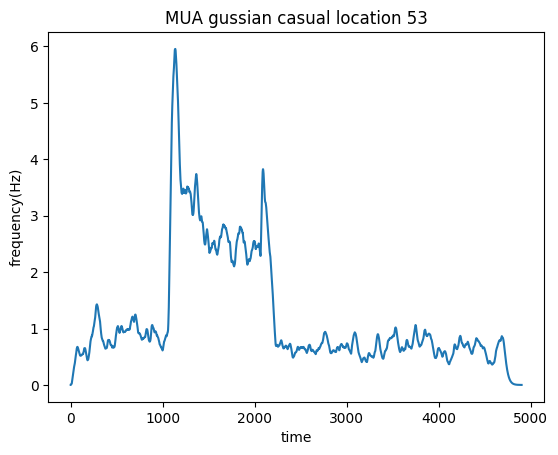

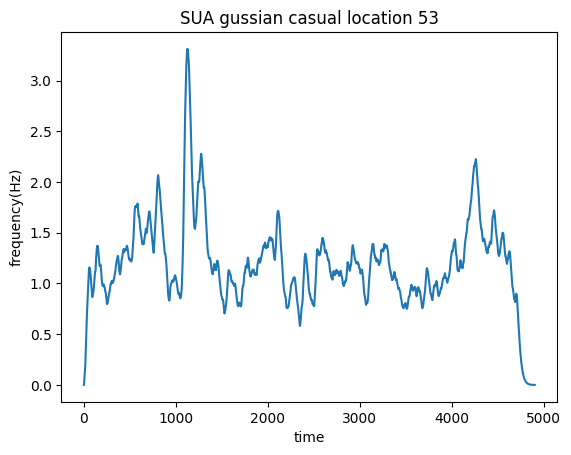

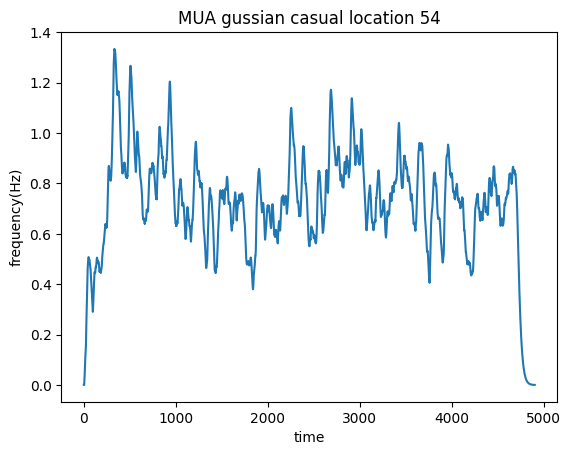

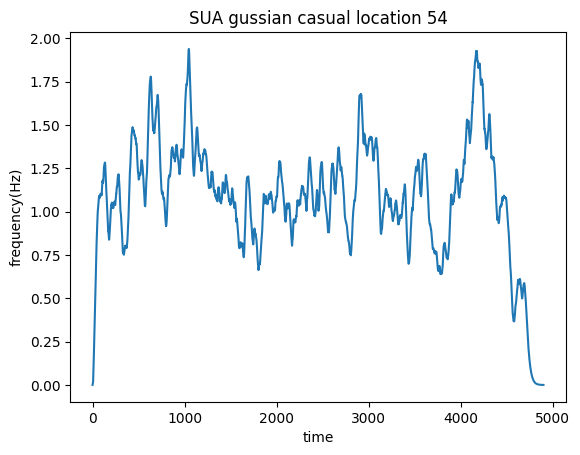

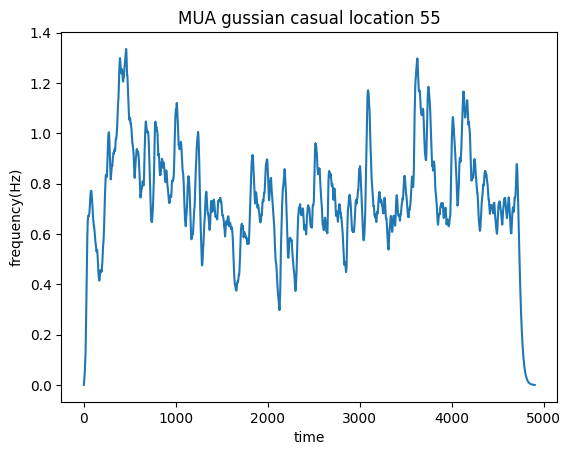

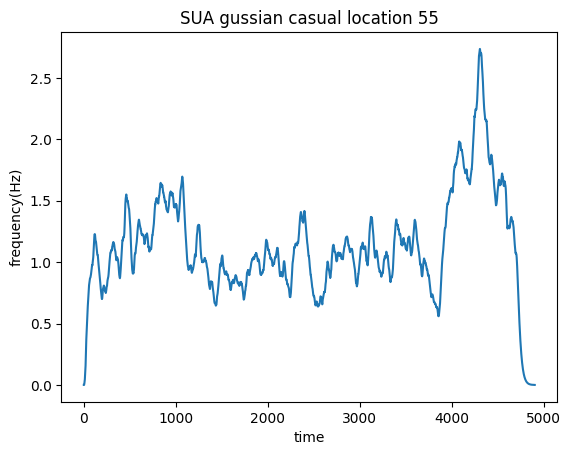

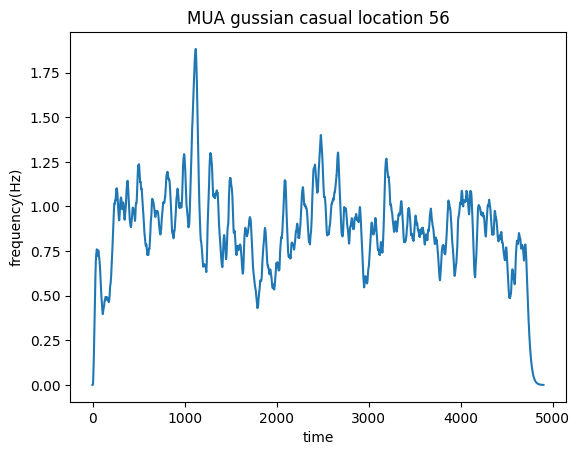

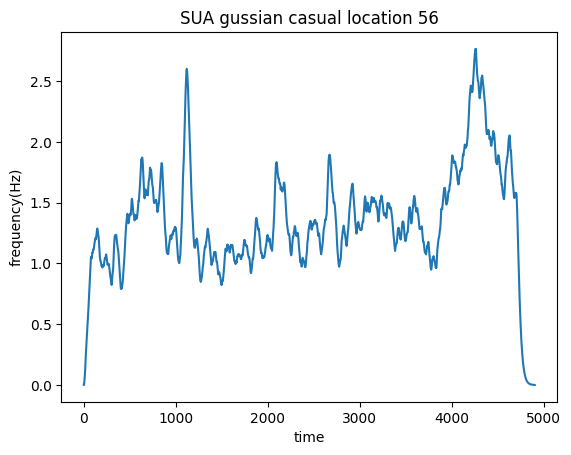

In [29]:
index_t_51= numpy.where(codes_5==51)[0] # all index of location 51 
index_t_52= numpy.where(codes_5==52)[0] # all index of location 52 
index_t_53= numpy.where(codes_5==53)[0] # all index of location 53 
index_t_54= numpy.where(codes_5==54)[0] # all index of location 54 
index_t_55= numpy.where(codes_5==55)[0] # all index of location 55 
index_t_56= numpy.where(codes_5==56)[0] # all index of location 56 

trial_L_51=s_mgs_4[index_t_51,:] # all trial with location 51
trial_L_52=s_mgs_4[index_t_52,:] # all trial with location 52
trial_L_53=s_mgs_4[index_t_53,:] # all trial with location 53
trial_L_54=s_mgs_4[index_t_54,:] # all trial with location 54
trial_L_55=s_mgs_4[index_t_55,:] # all trial with location 55
trial_L_56=s_mgs_4[index_t_56,:] # all trial with location 56

m_trial_L_51=m_mgs_4[index_t_51,:] # all trial with location 51
m_trial_L_52=m_mgs_4[index_t_52,:] # all trial with location 52
m_trial_L_53=m_mgs_4[index_t_53,:] # all trial with location 53
m_trial_L_54=m_mgs_4[index_t_54,:] # all trial with location 54
m_trial_L_55=m_mgs_4[index_t_55,:] # all trial with location 55
m_trial_L_56=m_mgs_4[index_t_56,:] # all trial with location 56



AVG_trial_L_51=numpy.mean(trial_L_51,axis=0) # average trials with location 51
AVG_trial_L_52=numpy.mean(trial_L_52,axis=0) # average trials with location 52
AVG_trial_L_53=numpy.mean(trial_L_53,axis=0) # average trials with location 53
AVG_trial_L_54=numpy.mean(trial_L_54,axis=0) # average trials with location 54
AVG_trial_L_55=numpy.mean(trial_L_55,axis=0) # average trials with location 55
AVG_trial_L_56=numpy.mean(trial_L_56,axis=0) # average trials with location 56


m_AVG_trial_L_51=numpy.mean(m_trial_L_51,axis=0) # average trials with location 51
m_AVG_trial_L_52=numpy.mean(m_trial_L_52,axis=0) # average trials with location 52
m_AVG_trial_L_53=numpy.mean(m_trial_L_53,axis=0) # average trials with location 53
m_AVG_trial_L_54=numpy.mean(m_trial_L_54,axis=0) # average trials with location 54
m_AVG_trial_L_55=numpy.mean(m_trial_L_55,axis=0) # average trials with location 55
m_AVG_trial_L_56=numpy.mean(m_trial_L_56,axis=0) # average trials with location 56

# firing rate for condition 51
# gaussian distribution ellipse

t=numpy.arange(0,201,1)
G_D_E=(5**2)*(t/100)*numpy.exp(-5*(t/100))

firing_rate_51=numpy.convolve(AVG_trial_L_51,G_D_E)
firing_rate_52=numpy.convolve(AVG_trial_L_52,G_D_E)
firing_rate_53=numpy.convolve(AVG_trial_L_53,G_D_E)
firing_rate_54=numpy.convolve(AVG_trial_L_54,G_D_E)
firing_rate_55=numpy.convolve(AVG_trial_L_55,G_D_E)
firing_rate_56=numpy.convolve(AVG_trial_L_56,G_D_E)

m_firing_rate_51=numpy.convolve(m_AVG_trial_L_51,G_D_E)
m_firing_rate_52=numpy.convolve(m_AVG_trial_L_52,G_D_E)
m_firing_rate_53=numpy.convolve(m_AVG_trial_L_53,G_D_E)
m_firing_rate_54=numpy.convolve(m_AVG_trial_L_54,G_D_E)
m_firing_rate_55=numpy.convolve(m_AVG_trial_L_55,G_D_E)
m_firing_rate_56=numpy.convolve(m_AVG_trial_L_56,G_D_E)


plt.figure(1)
plt.plot(firing_rate_51)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('MUA gussian casual location 51')


plt.figure(2)
plt.plot(m_firing_rate_51)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('SUA gussian casual location 51')

plt.figure(3)
plt.plot(firing_rate_52)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('MUA gussian casual location 52')


plt.figure(4)
plt.plot(m_firing_rate_52)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('SUA gussian casual location 52')

plt.figure(5)
plt.plot(firing_rate_53)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('MUA gussian casual location 53')


plt.figure(6)
plt.plot(m_firing_rate_53)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('SUA gussian casual location 53')

plt.figure(7)
plt.plot(firing_rate_54)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('MUA gussian casual location 54')


plt.figure(8)
plt.plot(m_firing_rate_54)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('SUA gussian casual location 54')

plt.figure(9)
plt.plot(firing_rate_55)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('MUA gussian casual location 55')


plt.figure(10)
plt.plot(m_firing_rate_55)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('SUA gussian casual location 55')

plt.figure(11)
plt.plot(firing_rate_56)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('MUA gussian casual location 56')


plt.figure(12)
plt.plot(m_firing_rate_56)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('SUA gussian casual location 56')

plt.show()

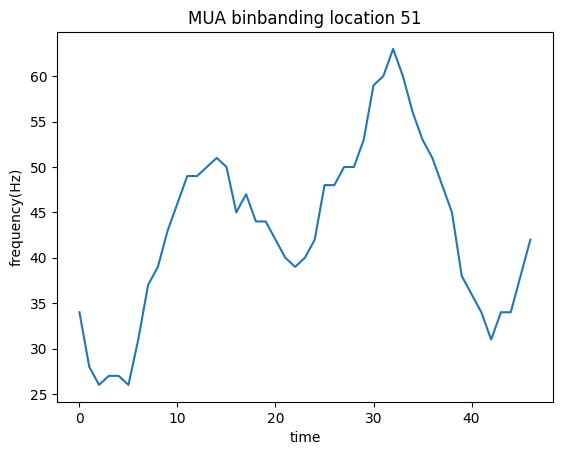

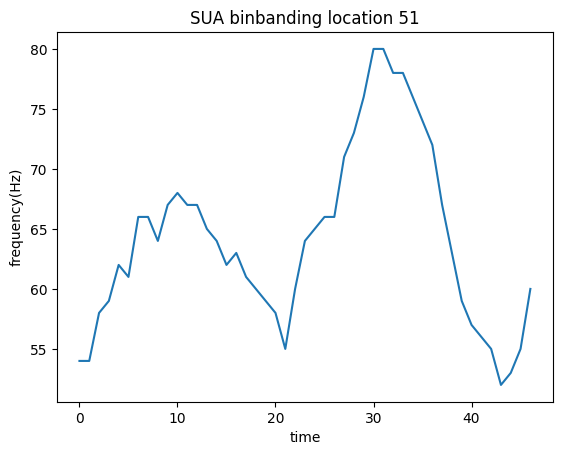

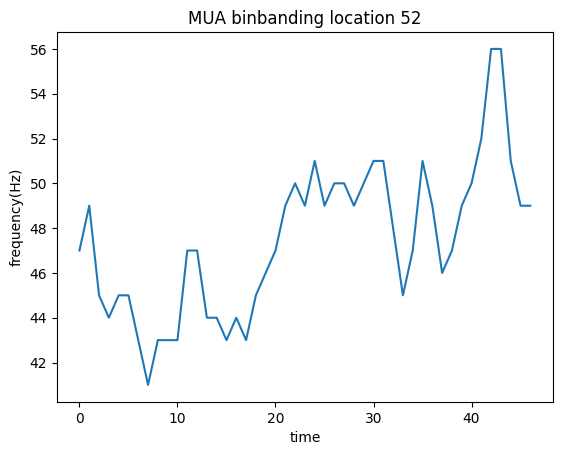

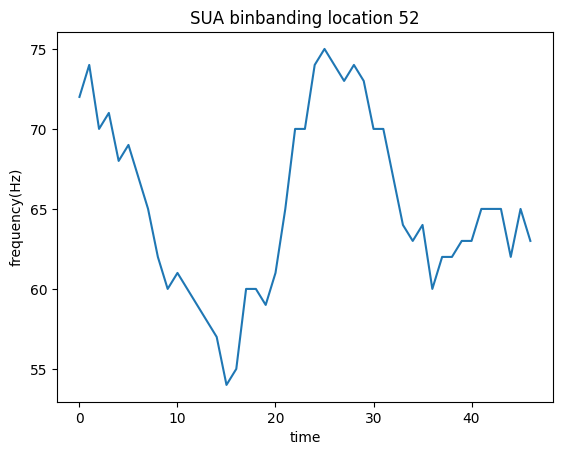

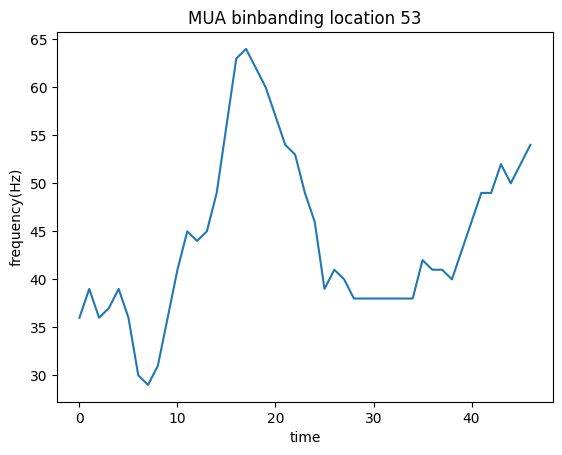

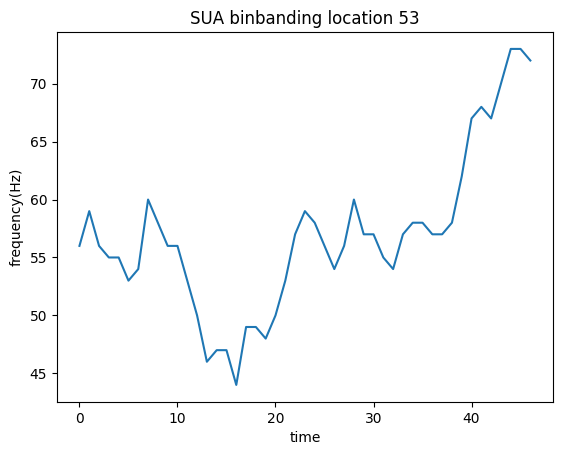

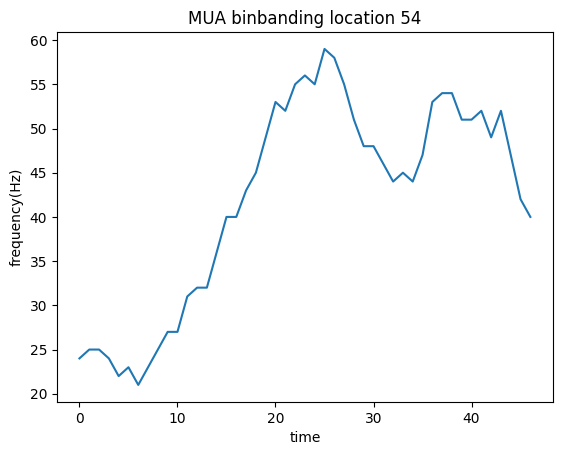

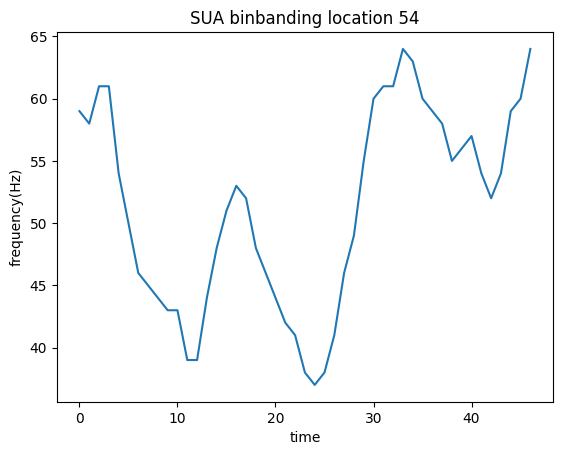

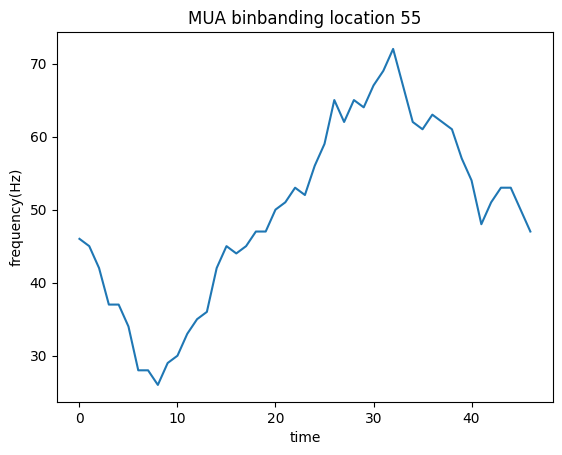

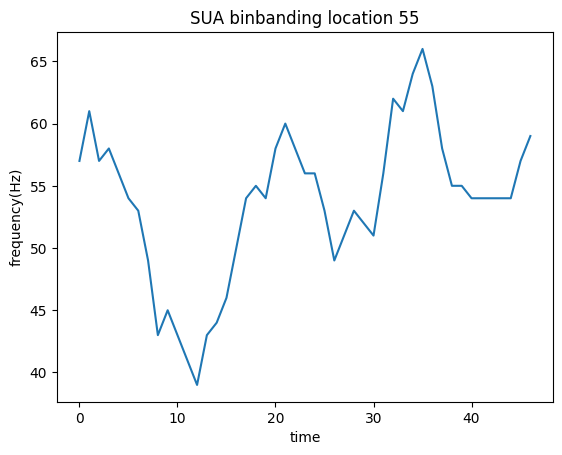

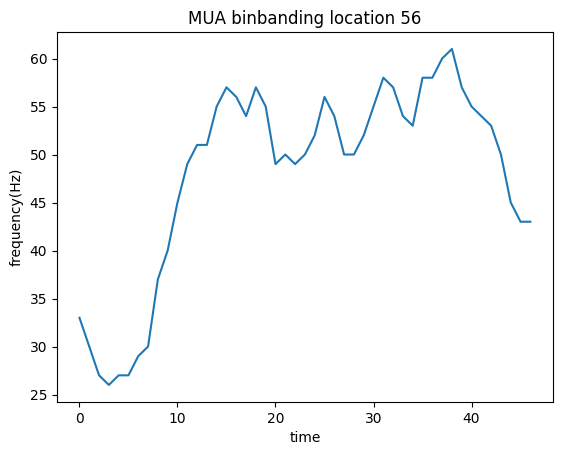

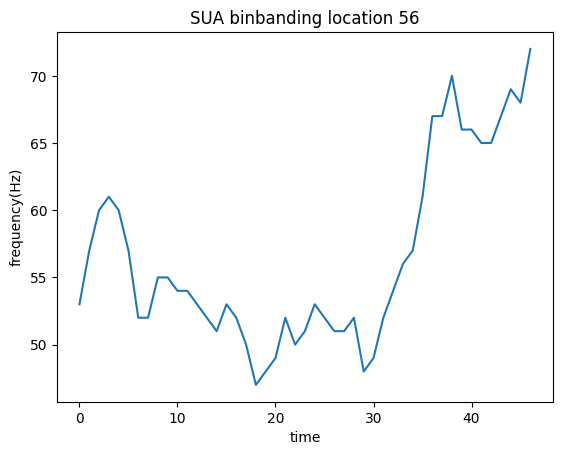

In [30]:
def FR(AVG_trial):
    # initialazation c
    c=0
    w=100 # Window Length
    firing_rate=numpy.zeros((len(AVG_trial)//w))
    for i in range(len(AVG_trial)//w):
        block = AVG_trial[i+c:i+w+c+1]
        c+=10
        count=0
        for j in range(len(block)):
            if block[j]>0:
                count+=1
        firing_rate[i]=(count/w)*100
    return firing_rate

index_t_51= numpy.where(codes_5==51)[0] # all index of location 51 
index_t_52= numpy.where(codes_5==52)[0] # all index of location 52 
index_t_53= numpy.where(codes_5==53)[0] # all index of location 53 
index_t_54= numpy.where(codes_5==54)[0] # all index of location 54 
index_t_55= numpy.where(codes_5==55)[0] # all index of location 55 
index_t_56= numpy.where(codes_5==56)[0] # all index of location 56 

trial_L_51=s_mgs_4[index_t_51,:] # all trial with location 51
trial_L_52=s_mgs_4[index_t_52,:] # all trial with location 52
trial_L_53=s_mgs_4[index_t_53,:] # all trial with location 53
trial_L_54=s_mgs_4[index_t_54,:] # all trial with location 54
trial_L_55=s_mgs_4[index_t_55,:] # all trial with location 55
trial_L_56=s_mgs_4[index_t_56,:] # all trial with location 56

m_trial_L_51=m_mgs_4[index_t_51,:] # all trial with location 51
m_trial_L_52=m_mgs_4[index_t_52,:] # all trial with location 52
m_trial_L_53=m_mgs_4[index_t_53,:] # all trial with location 53
m_trial_L_54=m_mgs_4[index_t_54,:] # all trial with location 54
m_trial_L_55=m_mgs_4[index_t_55,:] # all trial with location 55
m_trial_L_56=m_mgs_4[index_t_56,:] # all trial with location 56

AVG_trial_L_51=numpy.mean(trial_L_51,axis=0) # average trials with location 51
AVG_trial_L_52=numpy.mean(trial_L_52,axis=0) # average trials with location 52
AVG_trial_L_53=numpy.mean(trial_L_53,axis=0) # average trials with location 53
AVG_trial_L_54=numpy.mean(trial_L_54,axis=0) # average trials with location 54
AVG_trial_L_55=numpy.mean(trial_L_55,axis=0) # average trials with location 55
AVG_trial_L_56=numpy.mean(trial_L_56,axis=0) # average trials with location 56

m_AVG_trial_L_51=numpy.mean(m_trial_L_51,axis=0) # average trials with location 51
m_AVG_trial_L_52=numpy.mean(m_trial_L_52,axis=0) # average trials with location 52
m_AVG_trial_L_53=numpy.mean(m_trial_L_53,axis=0) # average trials with location 53
m_AVG_trial_L_54=numpy.mean(m_trial_L_54,axis=0) # average trials with location 54
m_AVG_trial_L_55=numpy.mean(m_trial_L_55,axis=0) # average trials with location 55
m_AVG_trial_L_56=numpy.mean(m_trial_L_56,axis=0) # average trials with location 56

# firing rate for condition 51
firing_rate_51=FR(AVG_trial_L_51)
firing_rate_52=FR(AVG_trial_L_52)
firing_rate_53=FR(AVG_trial_L_53)
firing_rate_54=FR(AVG_trial_L_54)
firing_rate_55=FR(AVG_trial_L_55)
firing_rate_56=FR(AVG_trial_L_56)

m_firing_rate_51=FR(m_AVG_trial_L_51)
m_firing_rate_52=FR(m_AVG_trial_L_52)
m_firing_rate_53=FR(m_AVG_trial_L_53)
m_firing_rate_54=FR(m_AVG_trial_L_54)
m_firing_rate_55=FR(m_AVG_trial_L_55)
m_firing_rate_56=FR(m_AVG_trial_L_56)


plt.figure(1)
plt.plot(firing_rate_51)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('MUA binbanding location 51')


plt.figure(2)
plt.plot(m_firing_rate_51)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('SUA binbanding location 51')

plt.figure(3)
plt.plot(firing_rate_52)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('MUA binbanding location 52')


plt.figure(4)
plt.plot(m_firing_rate_52)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('SUA binbanding location 52')

plt.figure(5)
plt.plot(firing_rate_53)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('MUA binbanding location 53')


plt.figure(6)
plt.plot(m_firing_rate_53)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('SUA binbanding location 53')

plt.figure(7)
plt.plot(firing_rate_54)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('MUA binbanding location 54')


plt.figure(8)
plt.plot(m_firing_rate_54)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('SUA binbanding location 54')

plt.figure(9)
plt.plot(firing_rate_55)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('MUA binbanding location 55')


plt.figure(10)
plt.plot(m_firing_rate_55)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('SUA binbanding location 55')

plt.figure(11)
plt.plot(firing_rate_56)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('MUA binbanding location 56')


plt.figure(12)
plt.plot(m_firing_rate_56)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('SUA binbanding location 56')

plt.show()

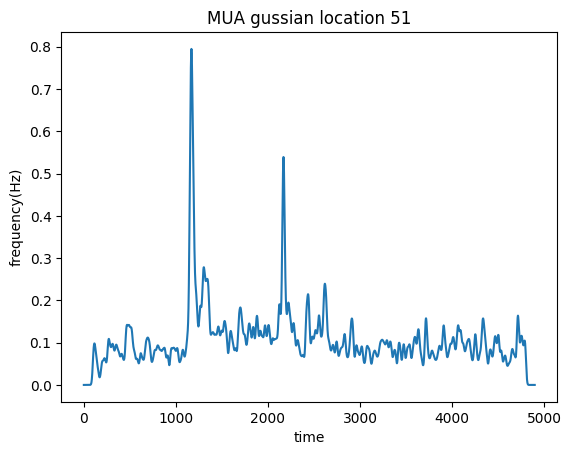

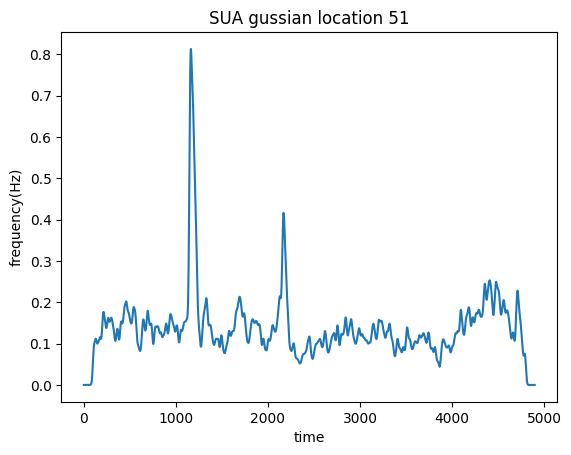

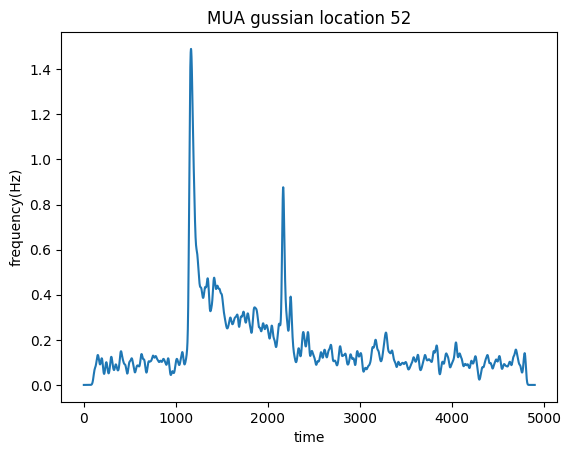

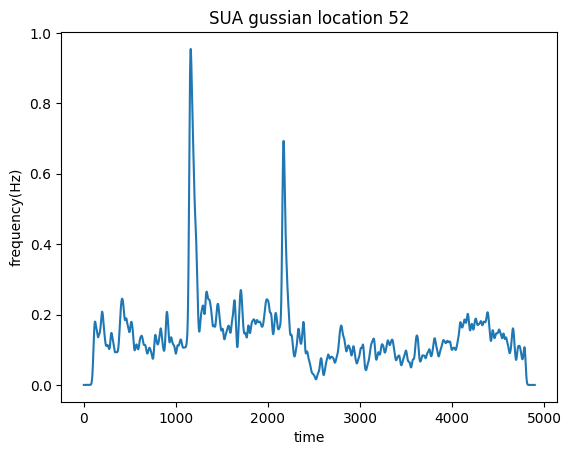

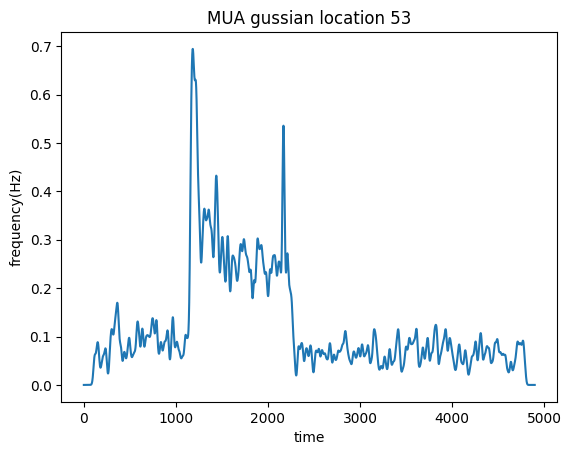

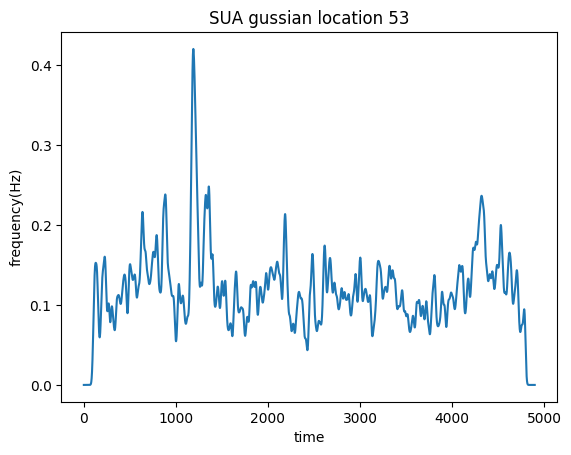

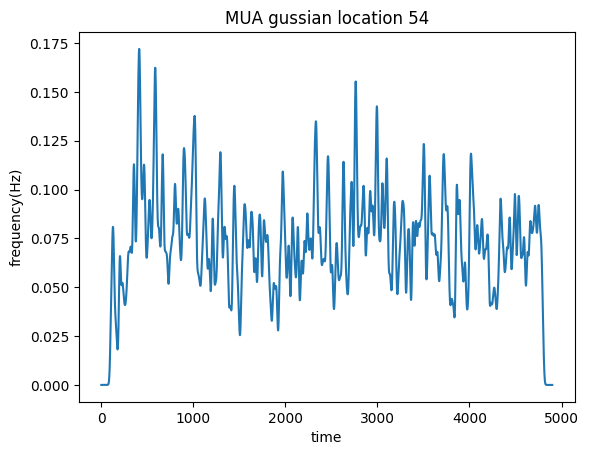

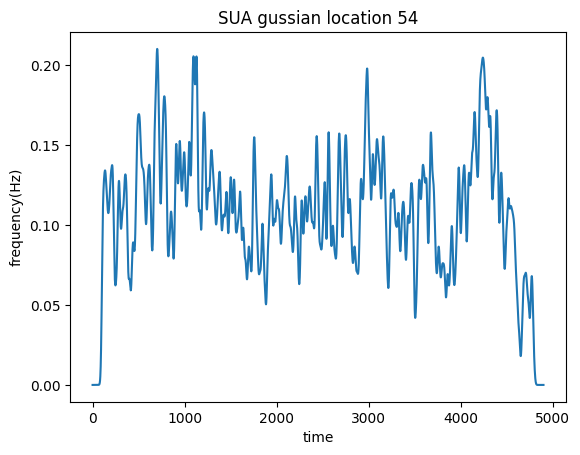

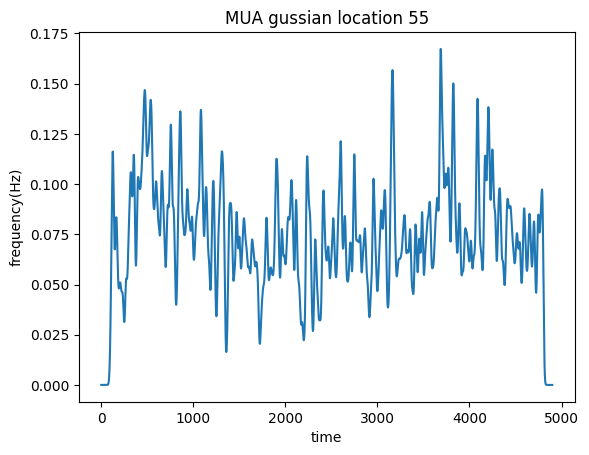

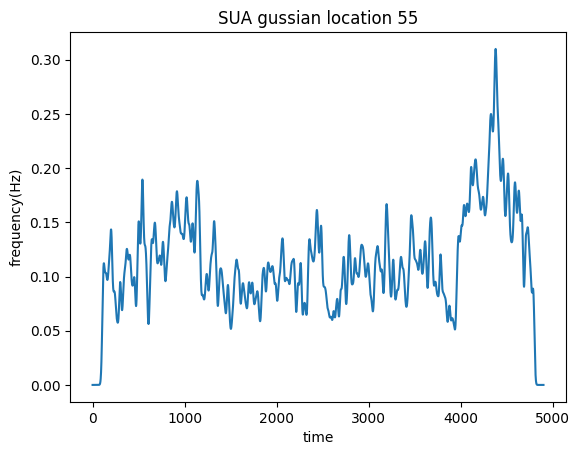

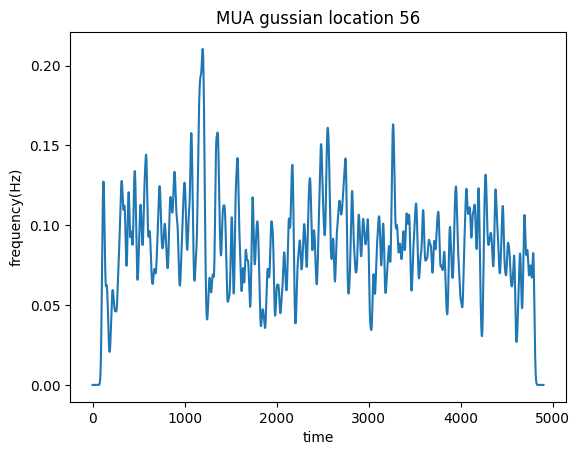

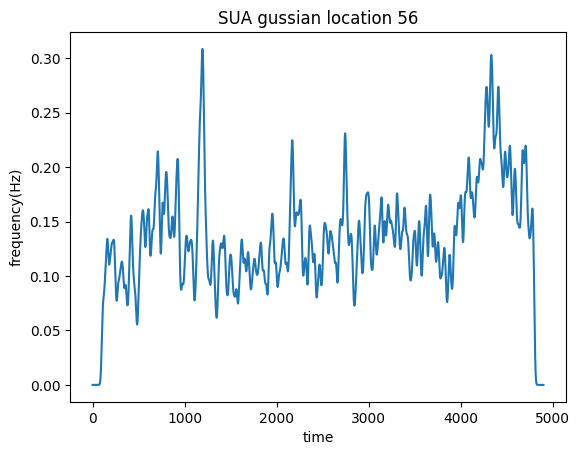

In [31]:
index_t_51= numpy.where(codes_5==51)[0] # all index of location 51 
index_t_52= numpy.where(codes_5==52)[0] # all index of location 52 
index_t_53= numpy.where(codes_5==53)[0] # all index of location 53 
index_t_54= numpy.where(codes_5==54)[0] # all index of location 54 
index_t_55= numpy.where(codes_5==55)[0] # all index of location 55 
index_t_56= numpy.where(codes_5==56)[0] # all index of location 56 

trial_L_51=s_mgs_4[index_t_51,:] # all trial with location 51
trial_L_52=s_mgs_4[index_t_52,:] # all trial with location 52
trial_L_53=s_mgs_4[index_t_53,:] # all trial with location 53
trial_L_54=s_mgs_4[index_t_54,:] # all trial with location 54
trial_L_55=s_mgs_4[index_t_55,:] # all trial with location 55
trial_L_56=s_mgs_4[index_t_56,:] # all trial with location 56

m_trial_L_51=m_mgs_4[index_t_51,:] # all trial with location 51
m_trial_L_52=m_mgs_4[index_t_52,:] # all trial with location 52
m_trial_L_53=m_mgs_4[index_t_53,:] # all trial with location 53
m_trial_L_54=m_mgs_4[index_t_54,:] # all trial with location 54
m_trial_L_55=m_mgs_4[index_t_55,:] # all trial with location 55
m_trial_L_56=m_mgs_4[index_t_56,:] # all trial with location 56

AVG_trial_L_51=numpy.mean(trial_L_51,axis=0) # average trials with location 51
AVG_trial_L_52=numpy.mean(trial_L_52,axis=0) # average trials with location 52
AVG_trial_L_53=numpy.mean(trial_L_53,axis=0) # average trials with location 53
AVG_trial_L_54=numpy.mean(trial_L_54,axis=0) # average trials with location 54
AVG_trial_L_55=numpy.mean(trial_L_55,axis=0) # average trials with location 55
AVG_trial_L_56=numpy.mean(trial_L_56,axis=0) # average trials with location 56

m_AVG_trial_L_51=numpy.mean(m_trial_L_51,axis=0) # average trials with location 51
m_AVG_trial_L_52=numpy.mean(m_trial_L_52,axis=0) # average trials with location 52
m_AVG_trial_L_53=numpy.mean(m_trial_L_53,axis=0) # average trials with location 53
m_AVG_trial_L_54=numpy.mean(m_trial_L_54,axis=0) # average trials with location 54
m_AVG_trial_L_55=numpy.mean(m_trial_L_55,axis=0) # average trials with location 55
m_AVG_trial_L_56=numpy.mean(m_trial_L_56,axis=0) # average trials with location 56

G_D = norm.pdf(numpy.arange(-10,10,0.1),0,1)

# firing rate for condition 51
firing_rate_51=numpy.convolve(AVG_trial_L_51,G_D)
firing_rate_52=numpy.convolve(AVG_trial_L_52,G_D)
firing_rate_53=numpy.convolve(AVG_trial_L_53,G_D)
firing_rate_54=numpy.convolve(AVG_trial_L_54,G_D)
firing_rate_55=numpy.convolve(AVG_trial_L_55,G_D)
firing_rate_56=numpy.convolve(AVG_trial_L_56,G_D)

m_firing_rate_51=numpy.convolve(m_AVG_trial_L_51,G_D)
m_firing_rate_52=numpy.convolve(m_AVG_trial_L_52,G_D)
m_firing_rate_53=numpy.convolve(m_AVG_trial_L_53,G_D)
m_firing_rate_54=numpy.convolve(m_AVG_trial_L_54,G_D)
m_firing_rate_55=numpy.convolve(m_AVG_trial_L_55,G_D)
m_firing_rate_56=numpy.convolve(m_AVG_trial_L_56,G_D)

plt.figure(1)
plt.plot(firing_rate_51)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('MUA gussian location 51')


plt.figure(2)
plt.plot(m_firing_rate_51)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('SUA gussian location 51')

plt.figure(3)
plt.plot(firing_rate_52)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('MUA gussian location 52')


plt.figure(4)
plt.plot(m_firing_rate_52)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('SUA gussian location 52')

plt.figure(5)
plt.plot(firing_rate_53)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('MUA gussian location 53')


plt.figure(6)
plt.plot(m_firing_rate_53)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('SUA gussian location 53')

plt.figure(7)
plt.plot(firing_rate_54)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('MUA gussian location 54')


plt.figure(8)
plt.plot(m_firing_rate_54)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('SUA gussian location 54')

plt.figure(9)
plt.plot(firing_rate_55)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('MUA gussian location 55')


plt.figure(10)
plt.plot(m_firing_rate_55)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('SUA gussian location 55')

plt.figure(11)
plt.plot(firing_rate_56)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('MUA gussian location 56')


plt.figure(12)
plt.plot(m_firing_rate_56)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('SUA gussian location 56')

plt.show()

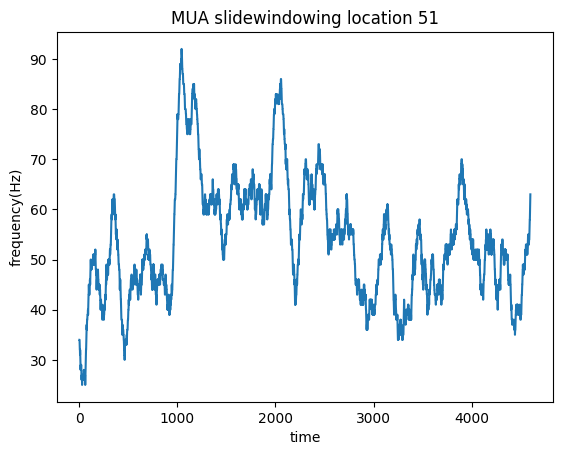

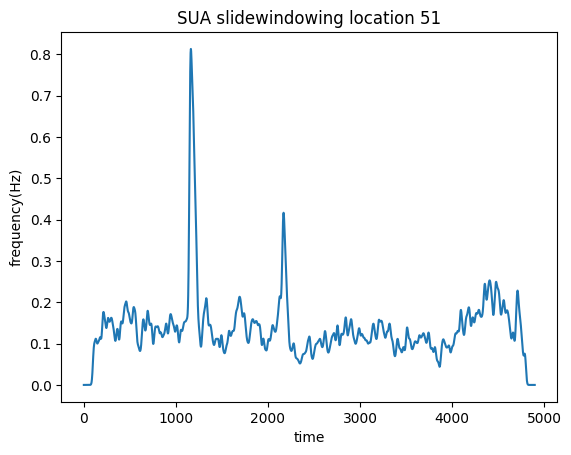

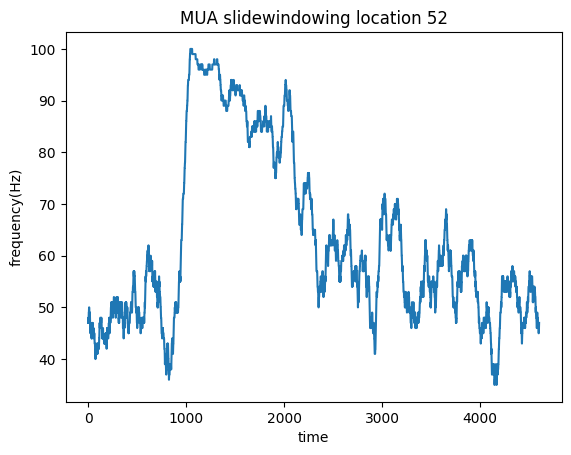

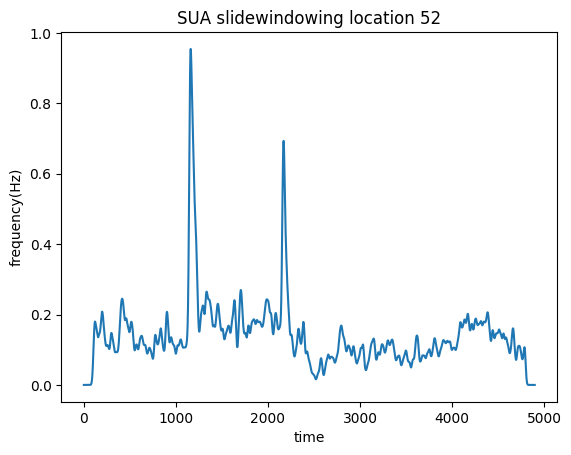

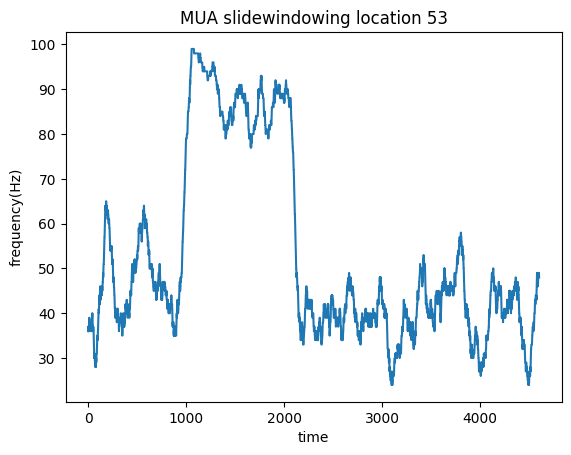

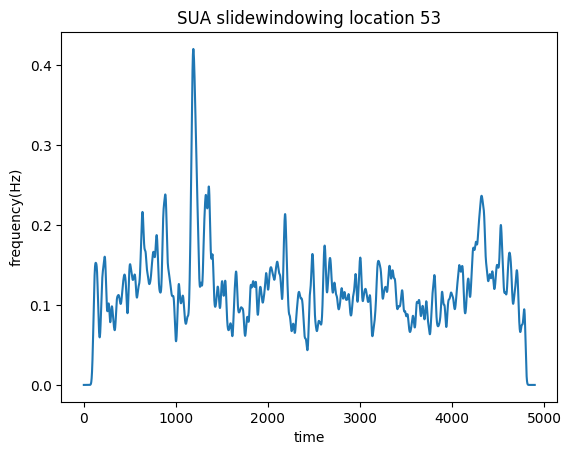

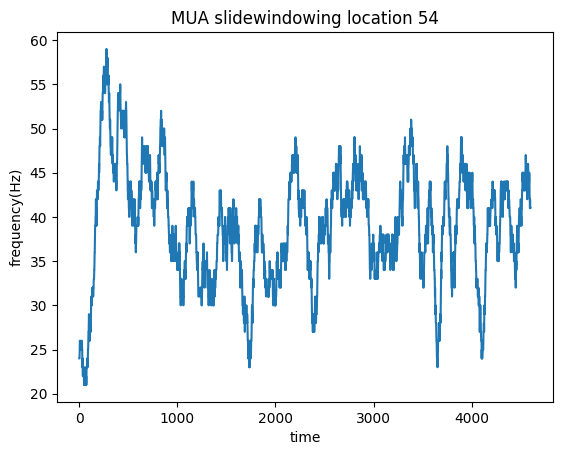

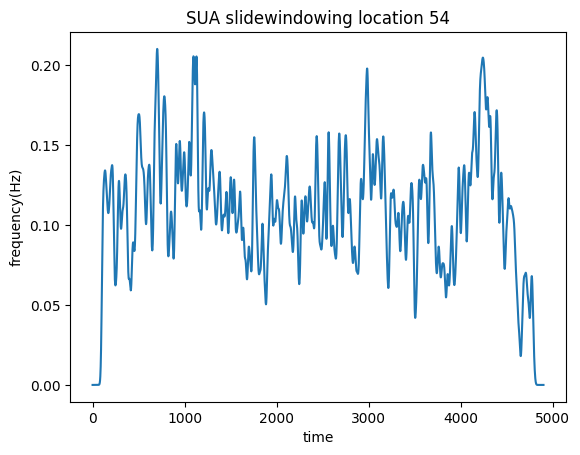

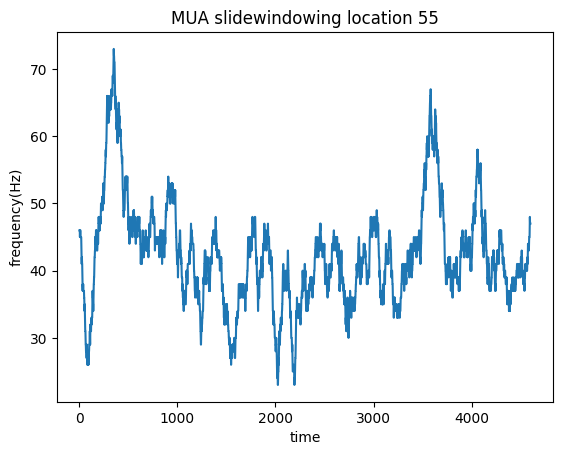

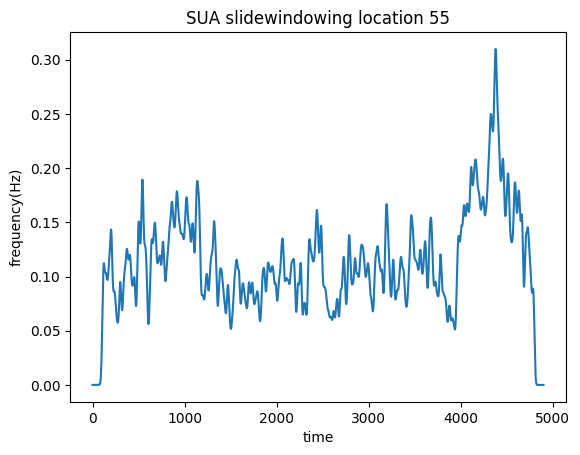

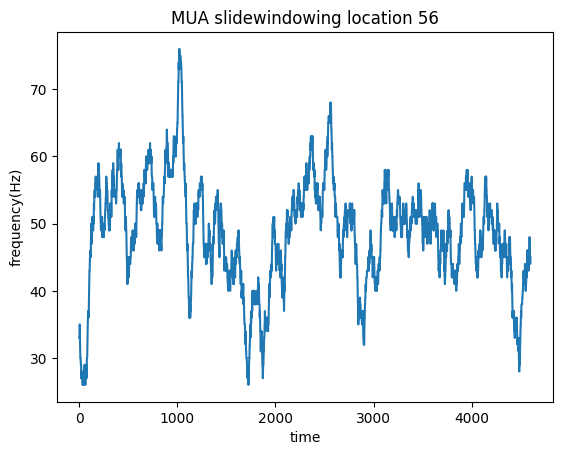

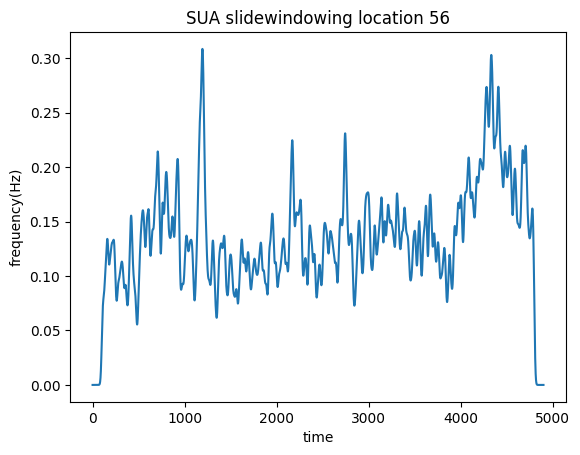

In [32]:
def FR(AVG_trial):
    w=100 # Window Length
    firing_rate=numpy.zeros((len(AVG_trial)-w))
    for i in range(len(AVG_trial)-w):
        block = AVG_trial[i:i+w+1]
        count=0
        for j in range(len(block)):
            if block[j]>0:
                count+=1
        firing_rate[i]=(count/w)*100
    return firing_rate

index_t_51= numpy.where(codes_5==51)[0] # all index of location 51 
index_t_52= numpy.where(codes_5==52)[0] # all index of location 52 
index_t_53= numpy.where(codes_5==53)[0] # all index of location 53 
index_t_54= numpy.where(codes_5==54)[0] # all index of location 54 
index_t_55= numpy.where(codes_5==55)[0] # all index of location 55 
index_t_56= numpy.where(codes_5==56)[0] # all index of location 56 

trial_L_51=s_mgs_4[index_t_51,:] # all trial with location 51
trial_L_52=s_mgs_4[index_t_52,:] # all trial with location 52
trial_L_53=s_mgs_4[index_t_53,:] # all trial with location 53
trial_L_54=s_mgs_4[index_t_54,:] # all trial with location 54
trial_L_55=s_mgs_4[index_t_55,:] # all trial with location 55
trial_L_56=s_mgs_4[index_t_56,:] # all trial with location 56

m_trial_L_51=m_mgs_4[index_t_51,:] # all trial with location 51
m_trial_L_52=m_mgs_4[index_t_52,:] # all trial with location 52
m_trial_L_53=m_mgs_4[index_t_53,:] # all trial with location 53
m_trial_L_54=m_mgs_4[index_t_54,:] # all trial with location 54
m_trial_L_55=m_mgs_4[index_t_55,:] # all trial with location 55
m_trial_L_56=m_mgs_4[index_t_56,:] # all trial with location 56

AVG_trial_L_51=numpy.mean(trial_L_51,axis=0) # average trials with location 51
AVG_trial_L_52=numpy.mean(trial_L_52,axis=0) # average trials with location 52
AVG_trial_L_53=numpy.mean(trial_L_53,axis=0) # average trials with location 53
AVG_trial_L_54=numpy.mean(trial_L_54,axis=0) # average trials with location 54
AVG_trial_L_55=numpy.mean(trial_L_55,axis=0) # average trials with location 55
AVG_trial_L_56=numpy.mean(trial_L_56,axis=0) # average trials with location 56

m_AVG_trial_L_51=numpy.mean(m_trial_L_51,axis=0) # average trials with location 51
m_AVG_trial_L_52=numpy.mean(m_trial_L_52,axis=0) # average trials with location 52
m_AVG_trial_L_53=numpy.mean(m_trial_L_53,axis=0) # average trials with location 53
m_AVG_trial_L_54=numpy.mean(m_trial_L_54,axis=0) # average trials with location 54
m_AVG_trial_L_55=numpy.mean(m_trial_L_55,axis=0) # average trials with location 55
m_AVG_trial_L_56=numpy.mean(m_trial_L_56,axis=0) # average trials with location 56

# firing rate for condition 51
firing_rate_51=FR(AVG_trial_L_51)
firing_rate_52=FR(AVG_trial_L_52)
firing_rate_53=FR(AVG_trial_L_53)
firing_rate_54=FR(AVG_trial_L_54)
firing_rate_55=FR(AVG_trial_L_55)
firing_rate_56=FR(AVG_trial_L_56)

m_firing_rate_51=numpy.convolve(m_AVG_trial_L_51,G_D)
m_firing_rate_52=numpy.convolve(m_AVG_trial_L_52,G_D)
m_firing_rate_53=numpy.convolve(m_AVG_trial_L_53,G_D)
m_firing_rate_54=numpy.convolve(m_AVG_trial_L_54,G_D)
m_firing_rate_55=numpy.convolve(m_AVG_trial_L_55,G_D)
m_firing_rate_56=numpy.convolve(m_AVG_trial_L_56,G_D)

plt.figure(1)
plt.plot(firing_rate_51)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('MUA slidewindowing location 51')


plt.figure(2)
plt.plot(m_firing_rate_51)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('SUA slidewindowing location 51')

plt.figure(3)
plt.plot(firing_rate_52)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('MUA slidewindowing location 52')


plt.figure(4)
plt.plot(m_firing_rate_52)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('SUA slidewindowing location 52')

plt.figure(5)
plt.plot(firing_rate_53)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('MUA slidewindowing location 53')


plt.figure(6)
plt.plot(m_firing_rate_53)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('SUA slidewindowing location 53')

plt.figure(7)
plt.plot(firing_rate_54)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('MUA slidewindowing location 54')


plt.figure(8)
plt.plot(m_firing_rate_54)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('SUA slidewindowing location 54')

plt.figure(9)
plt.plot(firing_rate_55)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('MUA slidewindowing location 55')


plt.figure(10)
plt.plot(m_firing_rate_55)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('SUA slidewindowing location 55')

plt.figure(11)
plt.plot(firing_rate_56)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('MUA slidewindowing location 56')


plt.figure(12)
plt.plot(m_firing_rate_56)
plt.xlabel('time')
plt.ylabel('frequency(Hz)')
plt.title('SUA slidewindowing location 56')


plt.show()

Part 3 : Measure the firing rate of selected neurons for conditions IN (the condition with the highest response usually 51 in this date set) and OUT (condition 54 in this data set) during fixation (300 - 900 ms), visual period (1000 - 1600 ms), memory period (2400 - 3000 ms) and overall firing rate (during the whole trial).

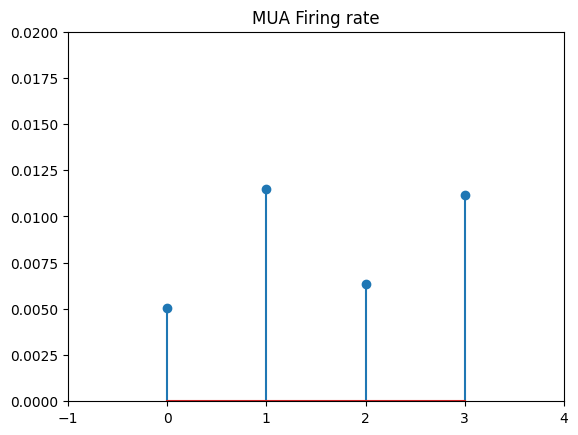

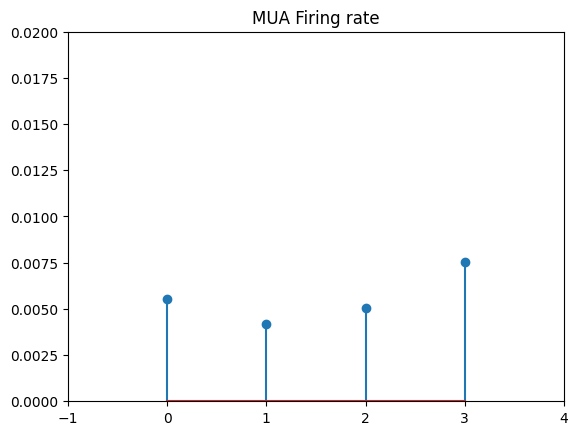

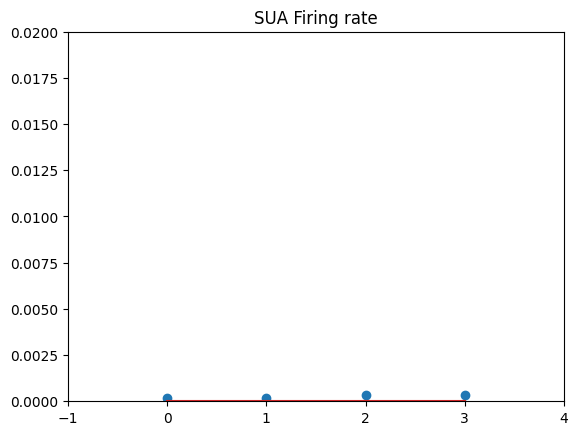

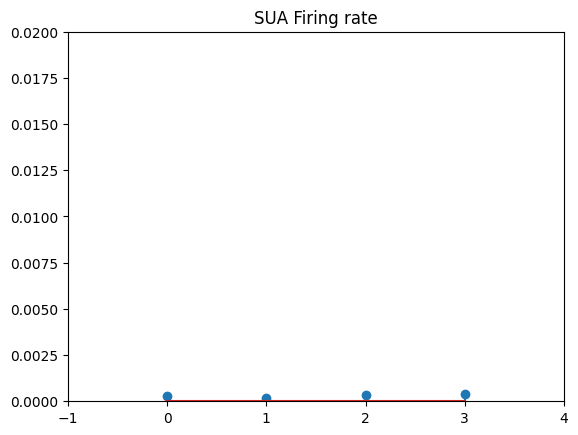

In [60]:


Pre_location = numpy.zeros((73, 4701, 2))
m_Pre_location = numpy.zeros((73, 4701, 2))
Q = [0, 0]

for i in range(len(codes_5)):
    if codes_5[i] == 51:
        Q[0] += 1
        Pre_location[Q[0]-1, numpy.arange(4701), 0] = s_mgs_4[i, :] 
    elif codes_5[i] == 54:
        Q[1] += 1
        Pre_location[Q[1]-1, numpy.arange(4701), 1] = s_mgs_4[i, :] 
        
for i in range(len(codes_5)):
    if codes_5[i] == 51:
        m_Pre_location[Q[0]-1, numpy.arange(4701), 0] = m_mgs_4[i, :] 
    elif codes_5[i] == 54:
        m_Pre_location[Q[1]-1, numpy.arange(4701), 1] = m_mgs_4[i, :] 

location = numpy.zeros((2, 4701))
m_location = numpy.zeros((2, 4701))
for i in range(2):
    location[i, :] = numpy.sum(Pre_location[:, :, i], axis=0) / Q[i] 
    
for i in range(2):
    m_location[i, :] = numpy.sum(m_Pre_location[:, :, i], axis=0) / Q[i] 

Firing_rate_IN = numpy.zeros(4)
Firing_rate_OUT = numpy.zeros(4)
m_Firing_rate_IN = numpy.zeros(4)
m_Firing_rate_OUT = numpy.zeros(4)

Firing_rate_IN[0] = numpy.sum(location[0, 300:900]) / 1000
Firing_rate_OUT[0] = numpy.sum(location[1, 300:900]) / 1000
Firing_rate_IN[1] = numpy.sum(location[0, 1000:1600]) / 1000
Firing_rate_OUT[1] = numpy.sum(location[1, 1000:1600]) / 1000
Firing_rate_IN[2] = numpy.sum(location[0, 2400:3000]) / 1000
Firing_rate_OUT[2] = numpy.sum(location[1, 2400:3000]) / 1000
Firing_rate_IN[3] = numpy.sum(location[0, :4701]) / 4700
Firing_rate_OUT[3] = numpy.sum(location[1, :4701]) / 4700

m_Firing_rate_IN[0] = numpy.sum(m_location[0, 300:900]) / 1000
m_Firing_rate_OUT[0] = numpy.sum(m_location[1, 300:900]) / 1000
m_Firing_rate_IN[1] = numpy.sum(m_location[0, 1000:1600]) / 1000
m_Firing_rate_OUT[1] = numpy.sum(m_location[1, 1000:1600]) / 1000
m_Firing_rate_IN[2] = numpy.sum(m_location[0, 2400:3000]) / 1000
m_Firing_rate_OUT[2] = numpy.sum(m_location[1, 2400:3000]) / 1000
m_Firing_rate_IN[3] = numpy.sum(m_location[0, :4701]) / 4700
m_Firing_rate_OUT[3] = numpy.sum(m_location[1, :4701]) / 4700

plt.figure(1)
plt.stem(Firing_rate_IN)
plt.axis([-1, 4, 0, 0.02])
plt.title('MUA Firing rate')
plt.figure(2)
plt.stem(Firing_rate_OUT)
plt.axis([-1, 4, 0, 0.02])
plt.title('MUA Firing rate')

plt.figure(3)
plt.stem(m_Firing_rate_IN)
plt.axis([-1, 4, 0, 0.02])
plt.title('SUA Firing rate')
plt.figure(4)
plt.stem(m_Firing_rate_OUT)
plt.axis([-1, 4, 0, 0.02])
plt.title('SUA Firing rate')

plt.show()


## Question 3 :

**Consider 3 periods of mgs task and answer the questions for two selected neurons (one from SUA and one from MUA) :**

Part 1 : Find and plot the inter-spike interval distribution of selected neurons during fixation (300 - 900 ms), visual period (1000 - 1600 ms), memory period (2400 - 3000 ms), and overall firing rate (during the whole trial). What is your statement about the type of point process of this neuron?

<Figure size 640x480 with 0 Axes>

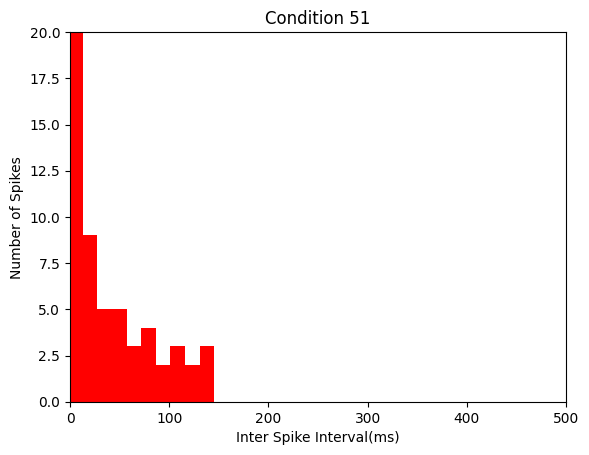

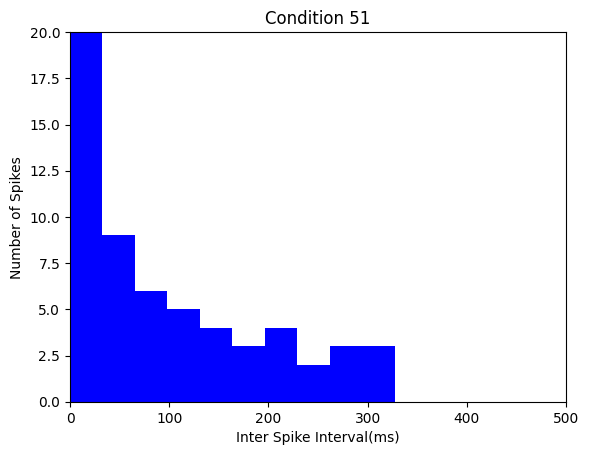

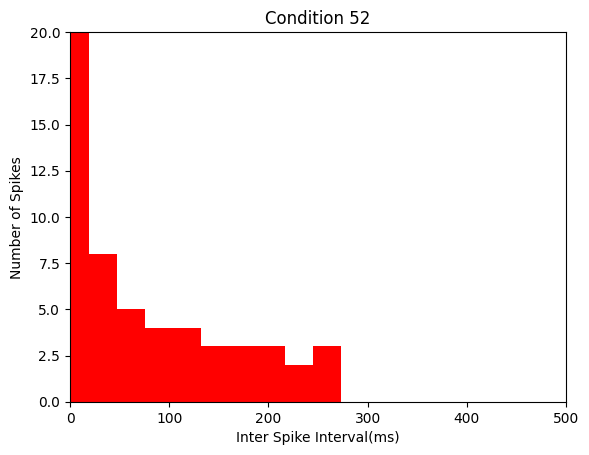

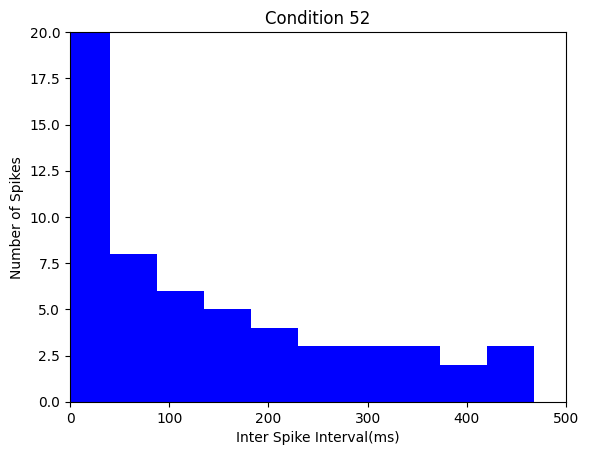

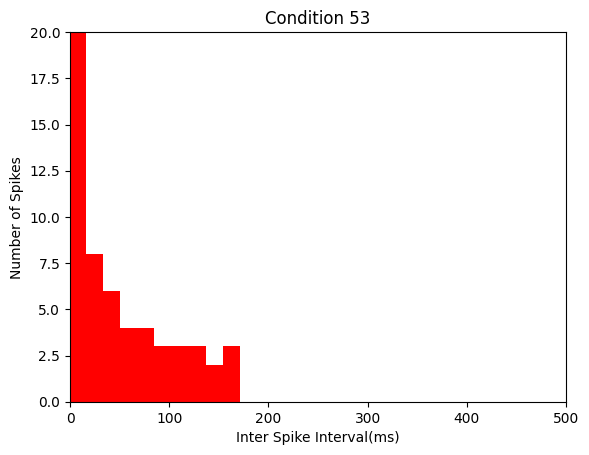

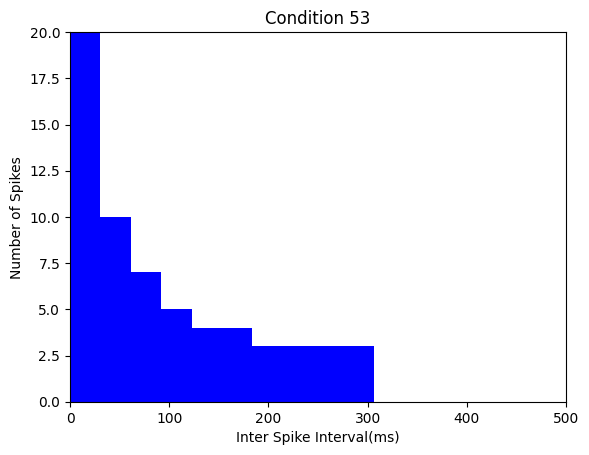

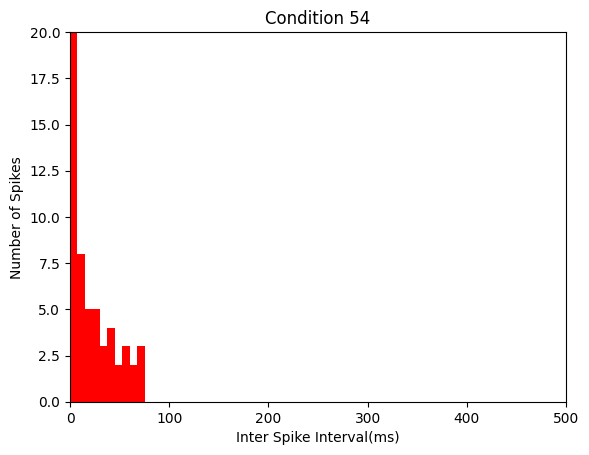

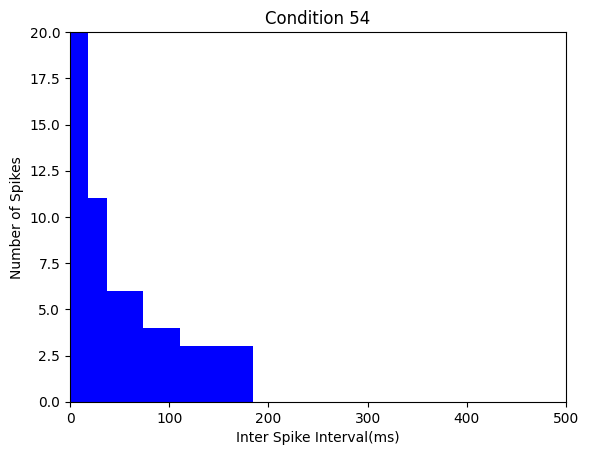

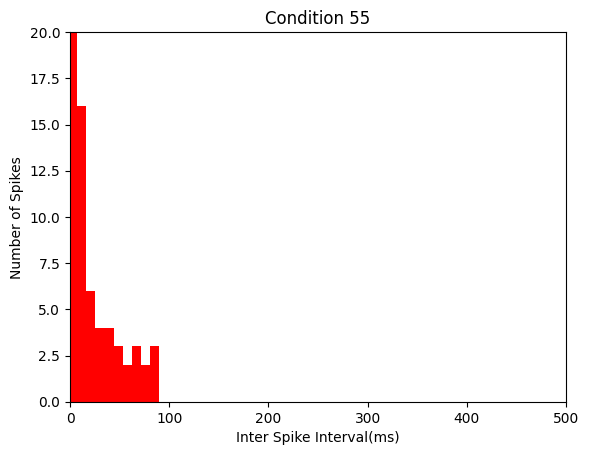

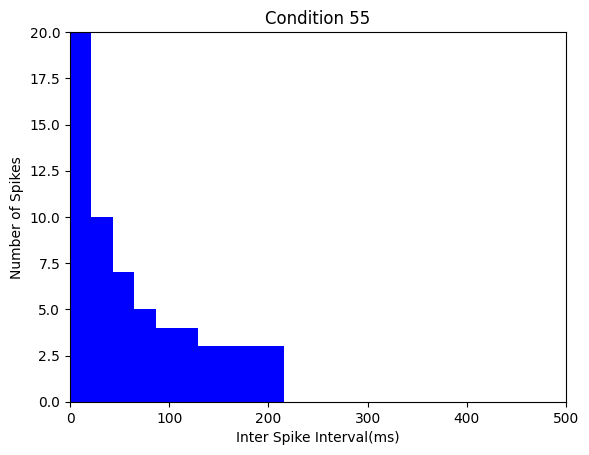

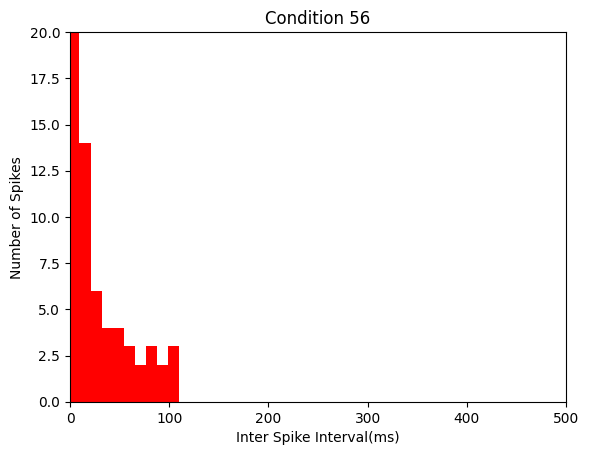

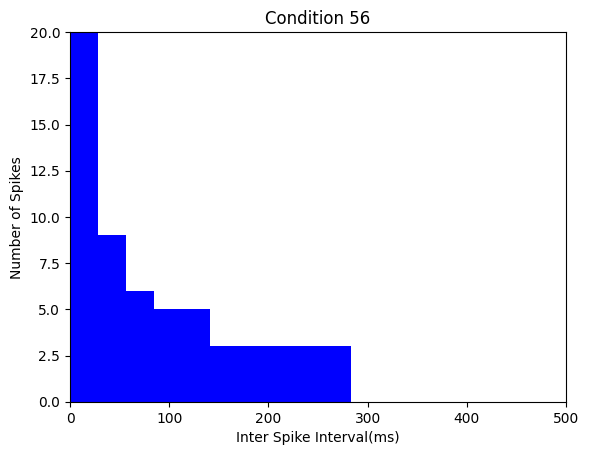

In [48]:
# Sample Frequency
Fs = 1000 
# during fixation (0-1000 ms), visual period (1000-2000 ms) and over all firing rate
Periods = numpy.array([[300,900], [1000,1600], [2400,3000],[0,4701]])
# inter spike interval
for p in range(0,4):
    plt.figure(p)
    # inter spike interval for each condition
    for condition in [51,52,53,54,55,56]:
        # find index for each condition
        index=numpy.where(codes_5==condition)[0]
        # spikes for condition
        spike = s_mgs_4[index,:]
        m_spike = m_mgs_4[index,:]
        inter = []
        for trial in range(spike.shape[0]):
            s = spike[trial,Periods[p,0]:Periods[p,1]] # spike for each Period
            # find all indexes that are equal to 1
            xx=numpy.where(s==1)[0]
            # Calculate the distance between the spike and other spikes
            inter=numpy.concatenate([inter,numpy.diff(xx)])
        inter=inter.astype('int32')
        inter_spike_interval = []
        for i in range(2,numpy.max(inter)+1):
            x=numpy.where(inter==i)[0]
            inter_spike_interval.append(len(x))
            
            
        for trial in range(spike.shape[0]):
            s = m_spike[trial,Periods[p,0]:Periods[p,1]] # spike for each Period
            # find all indexes that are equal to 1
            xx=numpy.where(s==1)[0]
            # Calculate the distance between the spike and other spikes
            inter=numpy.concatenate([inter,numpy.diff(xx)])
        inter=inter.astype('int32')
        m_inter_spike_interval = []
        for i in range(2,numpy.max(inter)+1):
            x=numpy.where(inter==i)[0]
            m_inter_spike_interval.append(len(x))   
        # plot
        plt.figure(condition-50)
        plt.hist(savgol_filter(inter_spike_interval,200,4),linewidth=1,color ='r')
        plt.axis([0, 500, 0, 20])
        plt.title('Condition '+str(condition)) 
        plt.xlabel('Inter Spike Interval(ms)')
        plt.ylabel('Number of Spikes')
        plt.figure(condition-50 + 6)
        plt.hist(savgol_filter(m_inter_spike_interval,200,4),linewidth=1,color ='b')
        plt.axis([0, 500, 0, 20])
        plt.title('Condition '+str(condition)) 
        plt.xlabel('Inter Spike Interval(ms)')
        plt.ylabel('Number of Spikes')
plt.show()

Part 2 : Measure Fanofactor and CV (coefficient of variation) of selected neurons during fixation (300 - 900 ms), visual period (1000 - 1600 ms), memory period (2400 - 3000 ms), and overall firing rate (during the whole trial). What is your statement about the type of point process of this neuron?

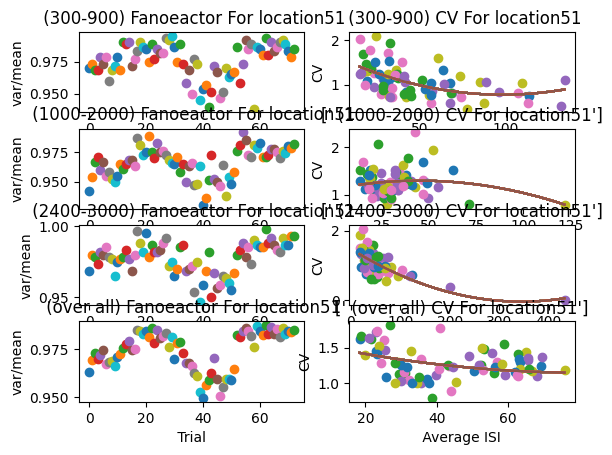

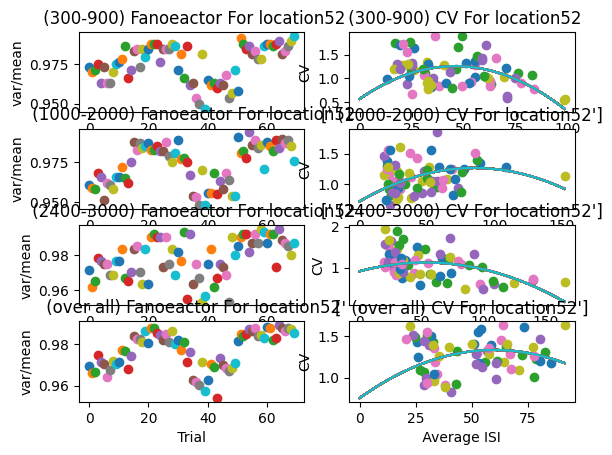

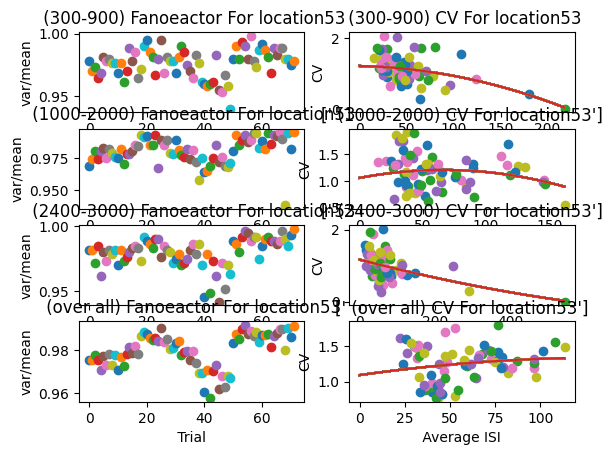

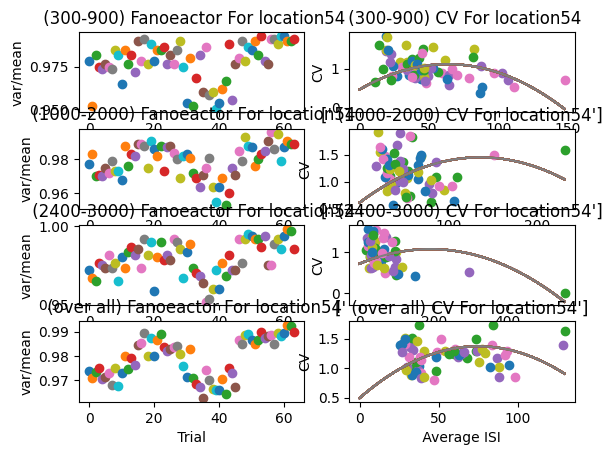

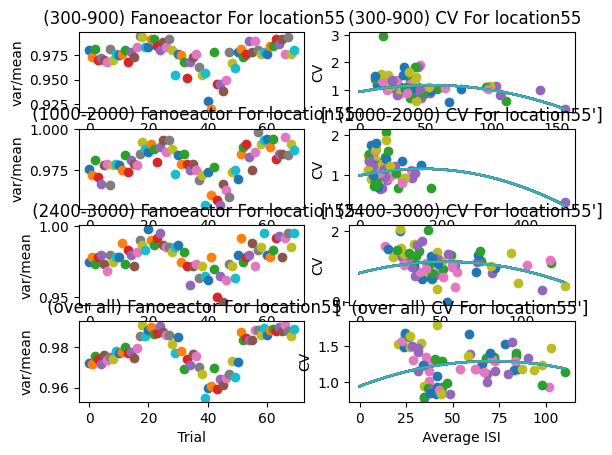

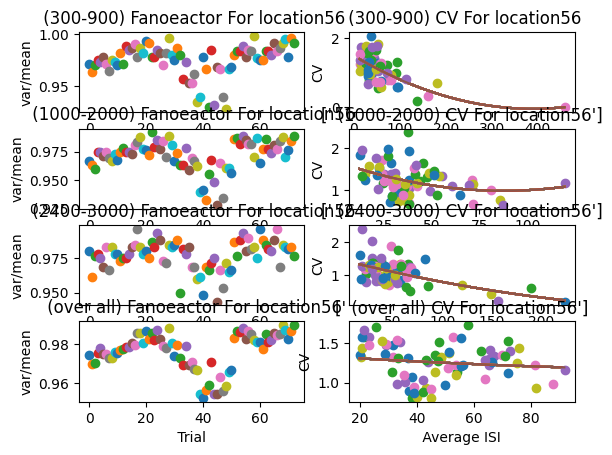

In [5]:
def isi(location,t1,t2):
    CNI = 0 
    for j in range(t1,t2):
        if (location[j] == 1):
            CNI+=1 

    CIM = 0 
    ISI= numpy.zeros(CNI)
    Cont = 0 
    for j in range(t1,t2-1):
        if (location[j] == 0):
            Cont += 1
        else:
            ISI[CIM] = Cont 
            CIM += 1 
            Cont = 0 
    return ISI

Labels=data['Event']['mgs']['codes'][:,4] 
s_mgs_4=data['spike'][3][0]['mgs'] 

location = numpy.zeros((73,4701,6))
Q = numpy.array([0, 0, 0, 0, 0, 0])
for i in range(len(Labels)):
    for j in range(6):
        if Labels[i] == (51+j):
            Q[j] += 1
            location[Q[j]-1,:,j] = s_mgs_4[i,:]
            
CV1 = numpy.zeros((6, max(Q)))
CV2 = numpy.zeros((6, max(Q)))
CV3 = numpy.zeros((6, max(Q)))
CV4 = numpy.zeros((6, max(Q)))

Average_ISI1 = numpy.zeros((6, max(Q)))
Average_ISI2 = numpy.zeros((6, max(Q)))
Average_ISI3 = numpy.zeros((6, max(Q)))
Average_ISI4 = numpy.zeros((6, max(Q)))

Fanoeactor1 = numpy.zeros((6, max(Q)))
Fanoeactor2 = numpy.zeros((6, max(Q)))
Fanoeactor3 = numpy.zeros((6, max(Q)))
Fanoeactor4 = numpy.zeros((6, max(Q)))
for i in range(6):

    for j in range(Q[i]):

        CV1[i,j] = (numpy.std(isi(location[j,300:900,i],0,600))/numpy.mean(isi(location[j,300:900,i],0,600)))
        CV2[i,j] = (numpy.std(isi(location[j,1000:2000,i],0,1000))/numpy.mean(isi(location[j,1000:2000,i],0,1000)))
        CV3[i,j] = (numpy.std(isi(location[j,2400:3000,i],0,600))/numpy.mean(isi(location[j,2400:3000,i],0,600)))
        CV4[i,j] = (numpy.std(isi(location[j,:,i],0,4701))/numpy.mean(isi(location[j,:,i],0,4701)))

        Average_ISI1[i,j] = numpy.mean(isi(location[j,300:900,i],0,600))
        Average_ISI2[i,j] = numpy.mean(isi(location[j,1000:2000,i],0,1000))
        Average_ISI3[i,j] = numpy.mean(isi(location[j,2400:3000,i],0,600))
        Average_ISI4[i,j] = numpy.mean(isi(location[j,:,i],0,4701))

        Fanoeactor1[i,j] = (numpy.var(location[j,300:900,i])/numpy.mean(location[j,300:900,i]))
        Fanoeactor2[i,j] = (numpy.var(location[j,1000:2000,i])/numpy.mean(location[j,1000:2000,i]))
        Fanoeactor3[i,j] = (numpy.var(location[j,2400:3000,i])/numpy.mean(location[j,2400:3000,i]))
        Fanoeactor4[i,j] = (numpy.var(location[j,:,i])/numpy.mean(location[j,:,i]))

for i in range(6):
    for j in range(0, Q[i]):
        plt.subplot (4,2,1)
        plt.plot(j,Fanoeactor1[i,j],'o') 
        plt.title((' (300-900) Fanoeactor For location' + str(51+i))) 
        plt.xlabel(' Trial ') 
        plt.ylabel('var/mean') 
        plt.subplot (4,2,2)
        plt.plot(Average_ISI1[i,j],(CV1[i,j]),'o')
        plt.title((' (300-900) CV For location'+ str(51+i))) 
        poly2_cv1=numpy.poly1d(numpy.polyfit(Average_ISI1[i,:], CV1[i,:], 2))
        x1=numpy.arange(numpy.amin(Average_ISI1[i,:]),numpy.amax(Average_ISI1[i,:]),0.1)
        plt.plot(x1,poly2_cv1(x1))  
        plt.xlabel (' Average ISI ') 
        plt.ylabel ('CV') 
        plt.subplot (4,2,3)
        plt.plot(j,Fanoeactor2[i,j],'o') 
        plt.title((' (1000-2000) Fanoeactor For location' + str(51+i))) 
        plt.xlabel(' Trial ') 
        plt.ylabel('var/mean') 
        plt.subplot (4,2,4)
        plt.plot(Average_ISI2[i,j],(CV2[i,j]),'o')
        plt.title([' (1000-2000) CV For location' + str(51+i)]) 
        poly2_cv2=numpy.poly1d(numpy.polyfit(Average_ISI2[i,:], CV2[i,:], 2))
        x2=numpy.arange(numpy.amin(Average_ISI2[i,:]),numpy.amax(Average_ISI2[i,:]),0.1)
        plt.plot(x2,poly2_cv2(x2))  
        plt.xlabel(' Average ISI ') 
        plt.ylabel('CV') 
        plt.subplot (4,2,5)
        plt.plot(j,Fanoeactor3[i,j],'o')
        plt.title((' (2400-3000) Fanoeactor For location' + str(51+i))) 
        plt.xlabel(' Trial ') 
        plt.ylabel('var/mean') 
        plt.subplot (4,2,6)
        plt.plot(Average_ISI3[i,j],(CV3[i,j]),'o')
        plt.title([' (2400-3000) CV For location' + str(51+i)]) 
        poly2_cv3=numpy.poly1d(numpy.polyfit(Average_ISI3[i,:], CV3[i,:], 2))
        x3=numpy.arange(numpy.amin(Average_ISI3[i,:]),numpy.amax(Average_ISI3[i,:]),0.1)
        plt.plot(x3,poly2_cv3(x3))  
        plt.xlabel(' Average ISI ') 
        plt.ylabel('CV') 


        plt.subplot (4,2,7)
        plt.plot(j,Fanoeactor4[i,j],'o') 
        plt.title((' (over all) Fanoeactor For location' + str(51+i))) 
        plt.xlabel(' Trial ') 
        plt.ylabel('var/mean') 
        plt.subplot (4,2,8)
        plt.plot(Average_ISI4[i,j],(CV4[i,j]),'o') 
        plt.title([' (over all) CV For location' + str(51+i)]) 
        poly2_cv4=numpy.poly1d(numpy.polyfit(Average_ISI1[i,:], CV4[i,:], 2))
        x4=numpy.arange(numpy.amin(Average_ISI4[i,:]),numpy.amax(Average_ISI4[i,:]),0.1)
        plt.plot(x4,poly2_cv4(x4))  
        plt.xlabel(' Average ISI ') 
        plt.ylabel('CV') 
        
    plt.show()

Part 3 : Measure Fanofactor and CV (coefficient of variation) across all neurons in MUA and SUA during fixation (300 - 900 ms), visual period (1000 - 1600 ms), memory period (2400 - 3000 ms), and overall firing rate (during the whole trial). What is your statement about the type of point process of neurons in area MT of monkey brain?